# Analysing the Monthly Sunspot Dataset from Machine Learning Mastery

This notebook is used to analyze the 'Shampoo Sales Datase' from the Machine Learning Mastery. The dataset is available [here](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/).

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

The notebook is dividede as follows:
    
1. Data exploration
2. Data modelling 
3. Conclusion

## 1. Data exploration

In this section, we explore the characteristics of the dataset, including its dimensions and characteristics of its variables.

The dataset contains only two columns and 36 lines.
The first column of the dataset contains strings denoting the month number and the second column cotains integers denoting the number of passengers for that month.

In [1]:
import pandas as pd
import numpy as np
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages (0.24.2)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')
df.reset_index(inplace=False)
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [4]:
from datetime import datetime, timedelta
from collections import OrderedDict

df_date = df.copy()

# Sample start and end dates
start = datetime(year=1749, month=1, day=1)
end = datetime(year=1983, month=1, day=1)

# Get list of months >= start and < end

months_ = OrderedDict(((start + timedelta(_)).strftime("%Y-%m-01"), 0) for _ in range((end - start).days))
months_list = list(months_.items())
months=[]
months = [months[0] for months in months_list]

for i in range(36):
    month_str = months[i]
    #date_time_month = datetime.strptime(month_str, '%Y-%m-%d').date()
    #df_date.iloc[i,0] = date_time_month
    df_date.iloc[i,0] = month_str
df_date.rename(columns={'Month':'Date'},inplace=True)
df_date.head()  

,Date,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [5]:
print(df_date.dtypes)
print(df_date.columns)

Date         object
Sunspots    float64
dtype: object
Index(['Date', 'Sunspots'], dtype='object')


### Data vizualization

"The first thing to do in any data analysis task is to plot the data because they enable many features of the data to be visualised, including patterns, unusual observations, changes over time, and relationships between variables" [(HYNDMAN; ATHANASOPOULOS, 2018)](https://otexts.com/fpp2/).

Therefore, we will start our analysis making some graphics that are useful for understanding timeseries. The obvious graph to start is a time plot.

The time plot shows that there is considerable seasonal variation (fluctuations with a fixed frequency). Besides, there does not seems to be a clear trend (long-term increase or decrease in the data). The time series period between maximums and minimus varies from 9 to 13 years, as can be seen in the second time plot. But we know that "the solar cycle or solar magnetic activity cycle is a nearly periodic 11-year change in the Sun's activity" [(WIKIPEDIA)](https://en.wikipedia.org/wiki/Solar_cycle).

The seasonal plot and seasonal polar plot confirm that there is seasonality in the data considering the same year, in 11 year peridos, with few exceptions. Besides, these plots give some indications that there may be a trend in the data because the values seems to be increasing from one decade to another.

Besides, we also need to look for autocorrelation in the dataset. From the autocorrelation function (ACF) plot, we see that our data clearly have a seasonality, as it is presenting a nonsymmetrical sine wave pattern [(HOLMES; SCHEURELL; WARD, 2021)](https://nwfsc-timeseries.github.io/atsa-labs/). This is also confirmed by the partial autocorrelation function (PACF). Therefore, our data probably have a **seasonality** and is **not stationary**.

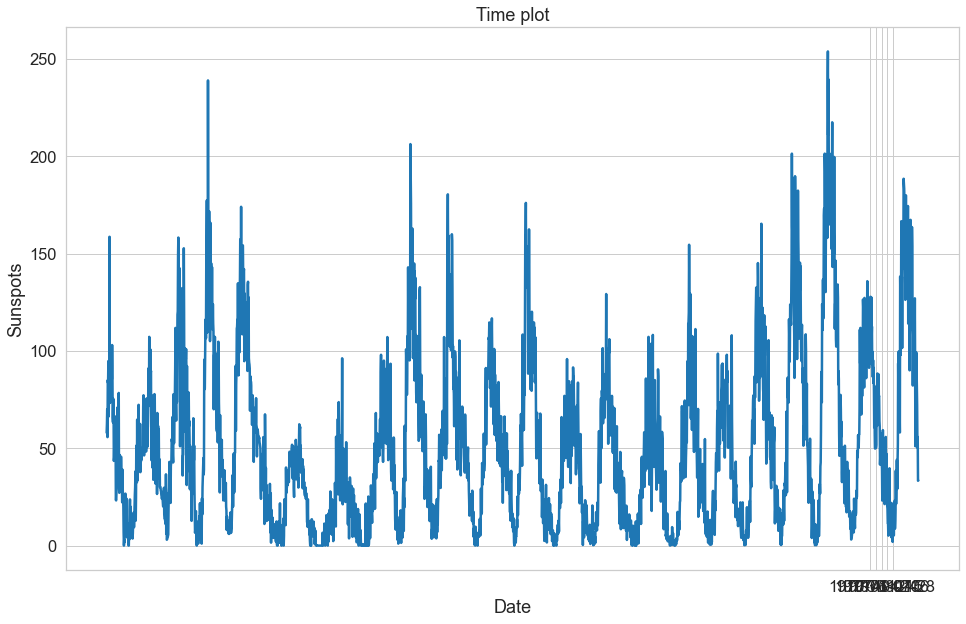

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

time_plot = df_date
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=time_plot,x='Date',y='Sunspots')
ax.set(xlabel='Date', ylabel = 'Sunspots')
ax.set_title('Time plot')
ax.set_xticks(np.arange(0, 2820 + 1, 600))
plt.show()

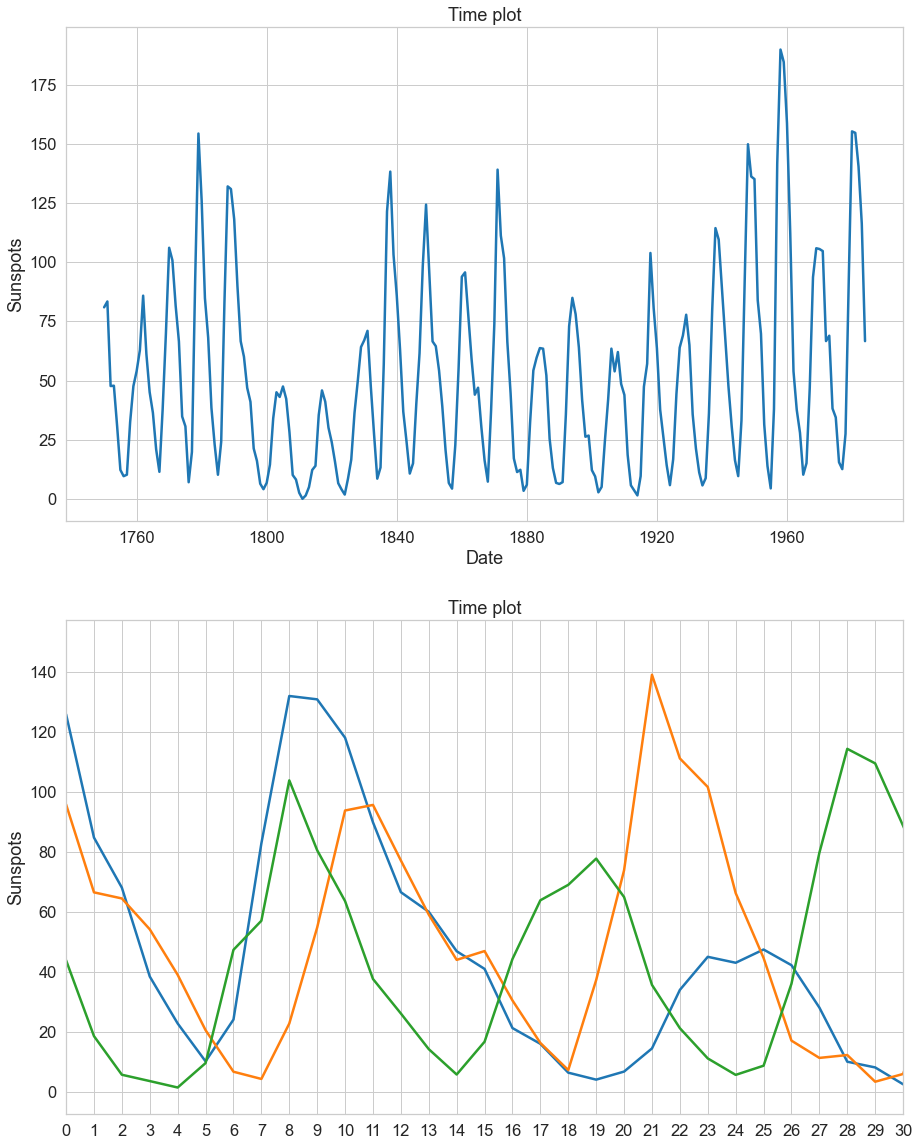

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [288]:
#Downsampling Data
df_anual = df_date.copy()
df_anual.set_index('Date',inplace=True)

resample = df_anual.Sunspots.resample('1Y')
anual_mean = resample.mean()
anual_mean = anual_mean.to_frame()
anual_mean.reset_index(inplace=True)

fig, axes = plt.subplots(2,1, figsize=(15, 20))
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.figure(figsize=(16, 10))
ax = sns.lineplot(ax=axes[0],data=anual_mean,x='Date',y='Sunspots')
axes[0].set(xlabel='Date', ylabel = 'Sunspots')
axes[0].set_title('Time plot')
#ax.set_xticks(np.arange(7, 235 + 1, 10))
#ax.set_xlim(0,235)

data1=anual_mean.iloc[30:61,1].reset_index()

plt.figure(figsize=(16, 10))
bx = sns.lineplot(ax=axes[1],data=anual_mean.iloc[30:71,1].reset_index(drop=True))
cx = sns.lineplot(ax=axes[1],data=anual_mean.iloc[100:141,1].reset_index(drop=True))
dx = sns.lineplot(ax=axes[1],data=anual_mean.iloc[160:201,1].reset_index(drop=True))
axes[1].set(ylabel = 'Sunspots')
axes[1].set_title('Time plot')
axes[1].set_xlim(0,30)
axes[1].set_xticks(np.arange(0, 30 + 1, 1))

plt.show()

In [761]:
df_seasonal = pd.DataFrame(columns=['season',0,1,2,3,4,5,6,7,8,9,10],index=np.arange(1, 24))
for i in range(21):
    df_seasonal.iloc[i,0] = 1749 + 11*i
    for j in range(11):
        n = 11*i+j+1
        k = j+1
        df_seasonal.iloc[i,k] = anual_mean.iloc[n,1]
df_seasonal.set_index('season',inplace=True)
df_seasonal.head()

,0,1,2,3,4,5,6,7,8,9,10
season,,,,,,,,,,,
1749.0,83.3917,47.6583,47.8,30.6917,12.2167,9.56667,10.1917,32.425,47.6,53.9667,62.8583
1760.0,85.85,61.15,45.1167,36.35,20.9083,11.4083,37.825,69.8417,106.092,100.8,81.5833
1771.0,66.4917,34.775,30.6167,7.00833,19.8167,92.5,154.367,125.925,84.8,68.0917,38.4583
1782.0,22.8,10.1667,24.1,82.8667,132.025,130.908,118.108,89.8917,66.5833,60.0417,46.9
1793.0,41,21.2667,16.0167,6.39167,4.06667,6.75833,14.475,34,45.0333,43.05,47.4667


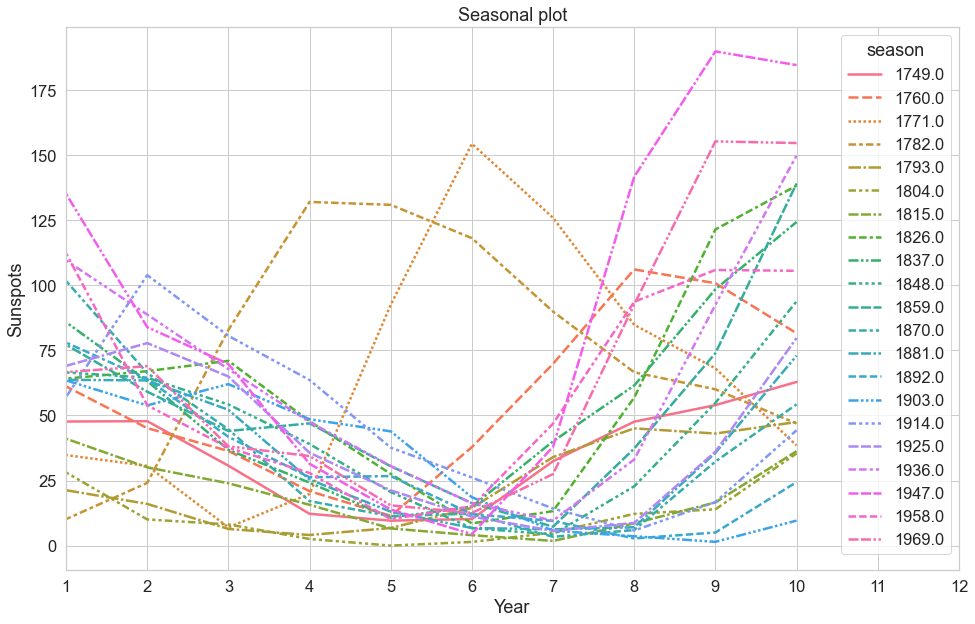

In [762]:
seasonal_plot = df_seasonal.astype(float).copy().transpose()
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=seasonal_plot)
ax.set(xlabel='Year', ylabel = 'Sunspots')
ax.set_title('Seasonal plot')
ax.set_xlim(1,10)
ax.set_xticks(np.arange(1, 12 + 1, 1))
plt.show()

In [763]:
import plotly.graph_objects as go


categories = list(df_seasonal.columns)
categories = [*categories, categories[0]]
categories = [str(i) for i in categories]

decade={}


for i in range(21):
    decade[i] = list(df_seasonal.iloc[i,:])
    decade[i] = [*decade[i], decade[i][0]]  
#print(categories)
#print(year_1)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=decade[0], theta=categories, name='1749'),
        go.Scatterpolar(r=decade[1], theta=categories, name='1760'),
        go.Scatterpolar(r=decade[2], theta=categories, name='1771'),
        go.Scatterpolar(r=decade[3], theta=categories, name='1782'),
        go.Scatterpolar(r=decade[4], theta=categories, name='1793'),
        go.Scatterpolar(r=decade[5], theta=categories, name='1804'),
        go.Scatterpolar(r=decade[6], theta=categories, name='1815'),
        go.Scatterpolar(r=decade[7], theta=categories, name='1826'),
        go.Scatterpolar(r=decade[8], theta=categories, name='1837'),
        go.Scatterpolar(r=decade[9], theta=categories, name='1848'),
        go.Scatterpolar(r=decade[10], theta=categories, name='1859'),
        go.Scatterpolar(r=decade[11], theta=categories, name='1870'),
        go.Scatterpolar(r=decade[12], theta=categories, name='1881'),
        go.Scatterpolar(r=decade[13], theta=categories, name='1892'),
        go.Scatterpolar(r=decade[14], theta=categories, name='1903'),
        go.Scatterpolar(r=decade[15], theta=categories, name='1914'),
        go.Scatterpolar(r=decade[16], theta=categories, name='1925'),
        go.Scatterpolar(r=decade[17], theta=categories, name='1936'),
        go.Scatterpolar(r=decade[18], theta=categories, name='1947'),
        go.Scatterpolar(r=decade[19], theta=categories, name='1958'),
        go.Scatterpolar(r=decade[20], theta=categories, name='1969')
    ],
    layout=go.Layout(
       title=go.layout.Title(text='Polar seasonal plot'),
        polar={'radialaxis': {'visible': True},'bgcolor':'PapayaWhip'},
        showlegend=True,
        width=750,
        height=750,
        font=dict(
        size=18,
        )
    )
)

fig.show()

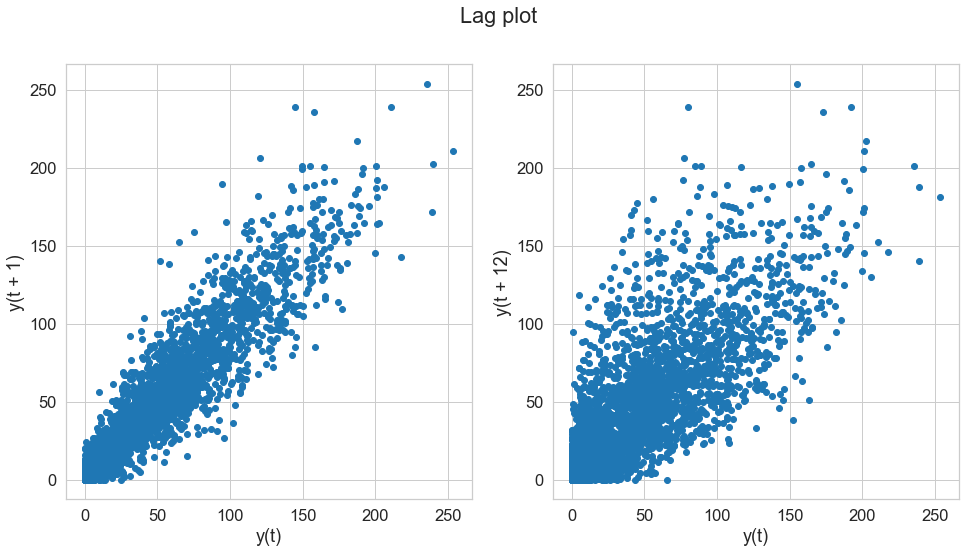

In [181]:
fig_lag = plt.figure(figsize=(16, 8))
#fig, ax = plt.subplots(1, 2, figsize=(12, 7))
#ax[0].set_xlabel('Time')
#ax[0].set_ylabel('Amplitude')
#ax[0].axhline(y=0, color='k')
fig_lag.suptitle('Lag plot')
plt.subplot(121)
pd.plotting.lag_plot(df_date['Sunspots'], lag= 1)
plt.subplot(122)
pd.plotting.lag_plot(df_date['Sunspots'], lag= 12)
plt.show()

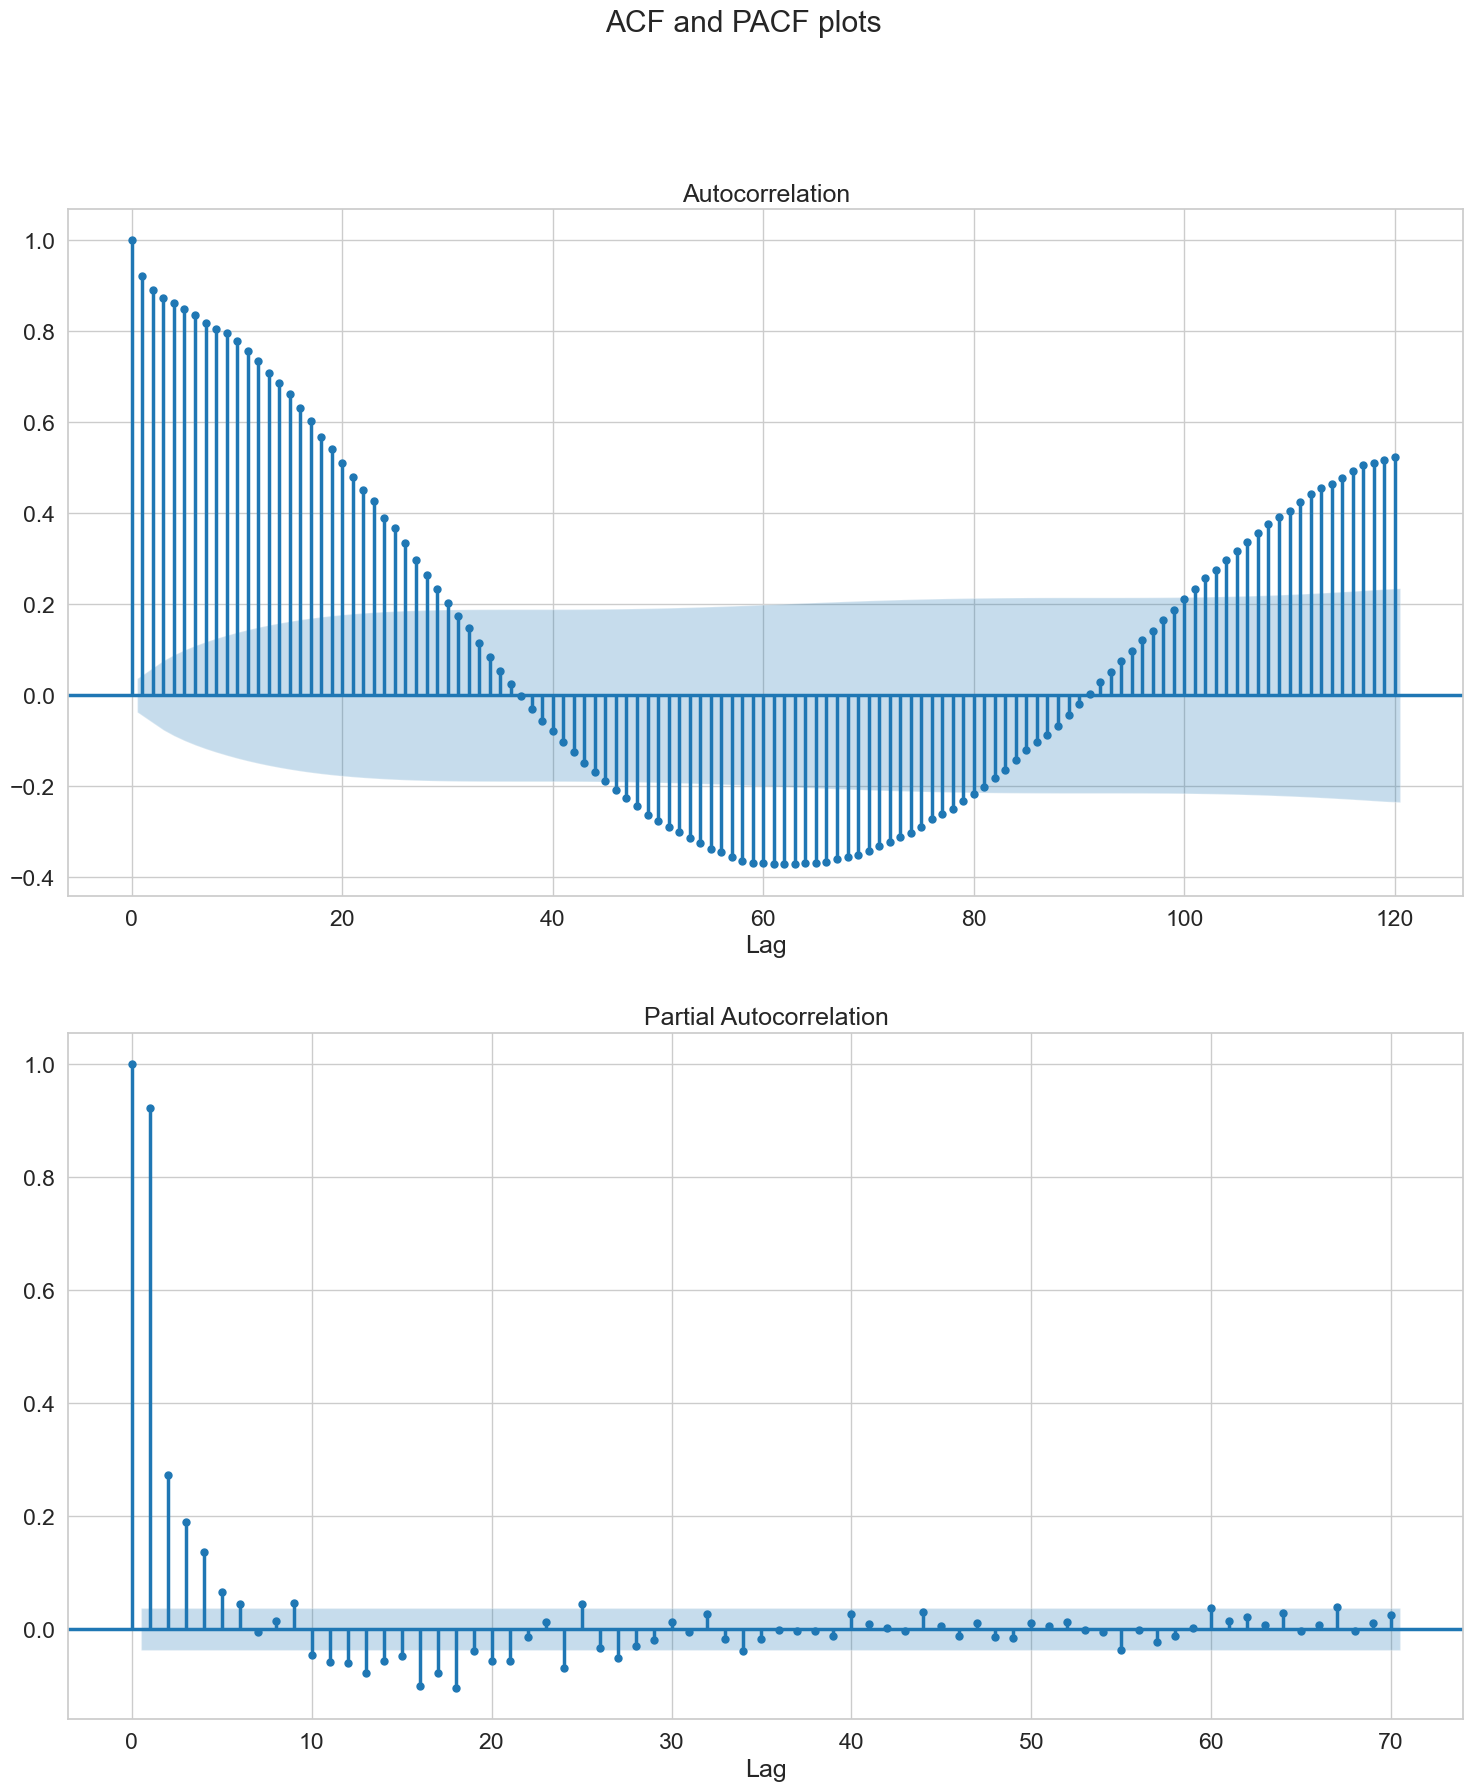

In [787]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig_auto, axes = plt.subplots(2,1,figsize=(18,20), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(df_date['Sunspots'], lags=120, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(df_date['Sunspots'], lags=70, ax=axes[1])
axes[1].set_xlabel('Lag')
plt.show()

## 2. Data modelling

### Data analysis

The results of the exploratory analysis indicated that the time series is not stationary, i.e., its properties depend on the time at which the series is observed. Before continuing, let's check this using two tests: 

1. Augmented Dickey Fuller test - ADH Test
2. Kwiatkowski-Phillips-Schmidt-Shin test – KPSS test
3. Dickey-Fuller GLS test - DFGLS test
4. Phillips-Perron test - PHP test

In the ADF test, the null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the p-value interpretation is just the opposite of ADH test. So, the time series is stationary if the null hypothesis is valid (p-value > 0.05).

The DFGLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. The null hypothesis is the same as the ADF test.

The PHP test is similar to the ADF except that the regression run does not include lagged values of the first differences. Instead, the PP test fixed the t-statistic using a long run variance estimation, implemented using a Newey-West covariance estimator. The null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value is less than the significance level (0.05), the series is stationary.

Using the tests with the functions default lags values, all the results indicate that the time series is stationary, despite the obvious seasonal trend identified in the exploratory analysis. However, setting the lags for higher values, more compatible with the PACF plot, we verify that our data fail in some of the tests, **confirming that it is not stationary**. 

Therefore, we need to **extract the seasonal component** of our data before trying to create a forecasting model. The first step is to decompose the data in its components, S (seasonal component), T (trend-cycle component), and R (remainder component) (HYNDMAN; ATHANASOPOULOS, 2018; HOLMES; SCHEURELL; WARD, 2021). There are many different methods for decomposing data. There are the so called 'classical decomposition methods': the additive and multiplicative methods. Besides, there are more recent methods, such as X11, Seasonal Extraction in ARIMA Time Series (SEATS), and Seasonal and Trend decomposition using Loess (STS). The [statsmodels library](https://www.statsmodels.org/stable/index.html) provides many of these methods. Therfore, we can easily try more than one of them.

Both the classical decomposition methods confirm that the **data have a strong seasonal component**. Moreover, **there is also a weak seasonal component** that was not detected in the exploratory analysis. However, these are 'naive' decompositions, thus we should use a more versatile and robust method. 

Thus, we can use the STL method to check our previous results. We use two kinds of STL methods. In the first case, we activate the 'robust' feature, which uses a data-dependent weighting function that re-weights data when estimating the LOESS (and so is using LOWESS). **Using robust estimation allows the model to tolerate larger errors**. In the second case, we do not activate the robust feature. Besides, we use the decomposed components to measure the strenght of trend and seasonality in the time series. In this case, the closer Ft and Fs are to 1, the higher is the strenght.

The results from both methods show that **there is a strong seasonal component** in the data. However, the robust STL indicate that the seasonal component is not so relevant, while the non-robust STL result indicates the contrary.

We need to remove the trend and the seasonality to use be able to use the data to make forecasts. 

We will test two methods see which of them return the more stationary time series. 

First, we use differencing, i.e., compute the differences between consecutive observations. "Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality" (HYNDMAN; ATHANASOPOULOS, 2018). **After differencing the time series, the result of the ADF and the KPSS testes show that the resulting time series is still not stationary**. 

Second, we try to remove the trend using a model fitting. "Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method [...] In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series" (BROWNLEE, 2020). **However, after fitting the the time series, stationatity is not confirmed in the tests**. This is probably due to the seasonal component we identified earlier. 

Therefore, we need to use a specific method to deal with the seasonality. **We may try first a seasonal differencing**. Then, if necessary, we can also apply the model fitting or another differencing to the deseazonalized data. **This is not necessary because the resulting deseasonalized time seris passes all tests**. Besides, we verified that the best results are achieved considering a period of 11 years for a season, instead of the 10 years we were considering before.

----------


In [193]:
!pip install arch

In [214]:
from arch.unitroot import PhillipsPerron, ADF, DFGLS, KPSS

print(PhillipsPerron(df_date['Sunspots']))
print('\n',DFGLS(df_date['Sunspots']))
print('\n',ADF(df_date['Sunspots']))
print('\n',KPSS(df_date['Sunspots']))

     Phillips-Perron Test (Z-tau)    
Test Statistic                -11.727
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

       Dickey-Fuller GLS Results      
Test Statistic                 -9.355
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.95 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

    Augmented Dickey-Fuller Results   
Test Statistic                 -9.568
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%

In [295]:
print(PhillipsPerron(df_date['Sunspots'],lags=120))
print('\n',DFGLS(df_date['Sunspots'],lags=120))
print('\n',ADF(df_date['Sunspots'],lags=120))
print('\n',KPSS(df_date['Sunspots'],lags=120))

     Phillips-Perron Test (Z-tau)    
Test Statistic                -10.773
P-value                         0.000
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

       Dickey-Fuller GLS Results      
Test Statistic                 -2.302
P-value                         0.021
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.95 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

    Augmented Dickey-Fuller Results   
Test Statistic                 -2.315
P-value                         0.167
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%

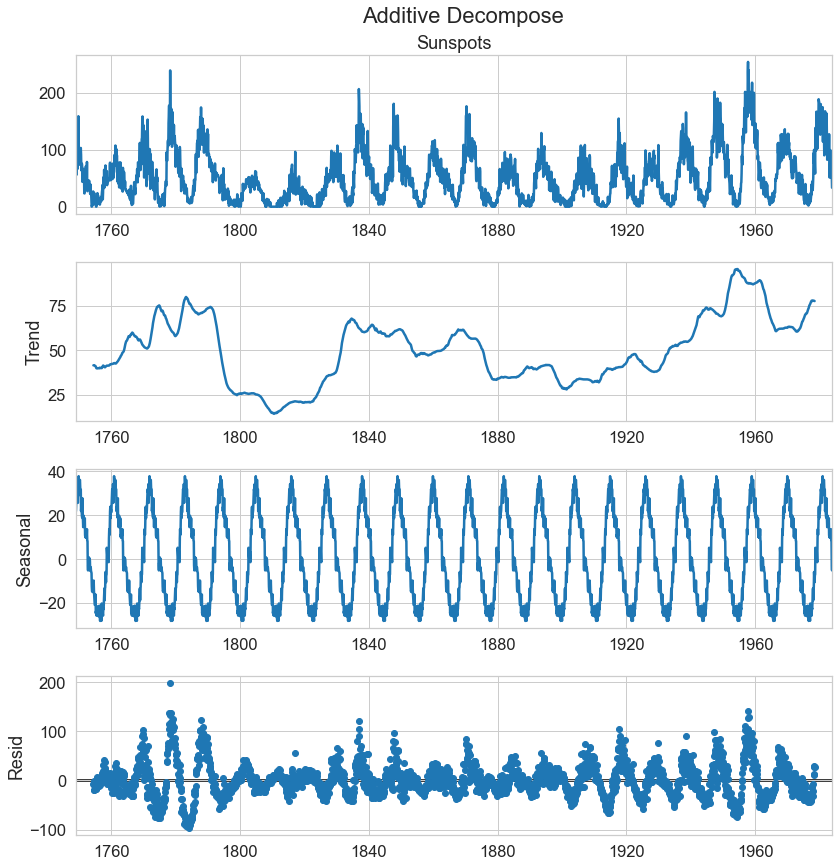

In [290]:
from statsmodels.tsa.seasonal import seasonal_decompose


'''df_decompose = df_date.copy()
df_decompose['Date'] = pd.to_datetime(df_date['Date'])
df_decompose.set_index('Date',inplace=True)'''

# Decomposition is  Multiplicative
#multiplicative = seasonal_decompose(df_anual['Sunspots'], model='multiplicative')

#adopting the period fo 10 years = 120 months
# Decomposition is  Additive
additive = seasonal_decompose(df_anual['Sunspots'], model='additive',period=132)

# Plotting
plt.rcParams.update({'figure.figsize': (12,12)})
#multiplicative.plot().suptitle('Multiplicative Decompose', x=0.55,y=1.01,fontsize=22)
additive.plot().suptitle('Additive Decompose', x=0.55,y=1.01, fontsize=22)
plt.show()

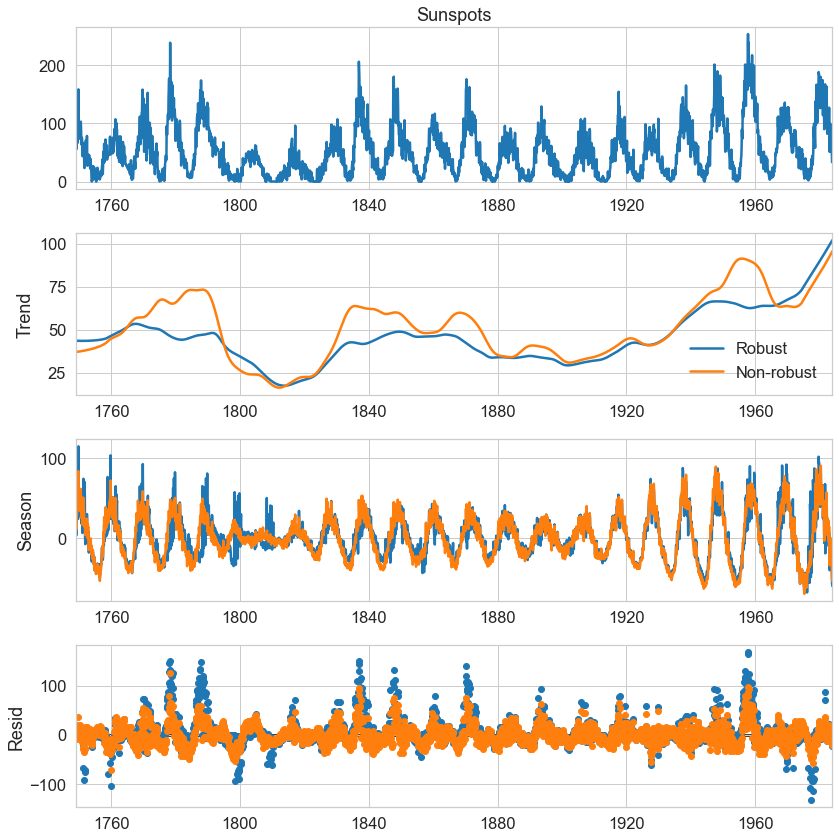

In [289]:
from statsmodels.tsa.seasonal import STL

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)

#adopting the period fo 10 years = 120 months
stl_R = STL(df_anual['Sunspots'],period=120,robust=True)
res_R = stl_R.fit()
fig = res_R.plot()
stl_nR = STL(df_anual['Sunspots'],period=120,robust=False)
res_nR = stl_nR.fit()
add_stl_plot(fig, res_nR, ['Robust','Non-robust'])

In [291]:
from statistics import variance

# Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_stl = pd.concat([res_R.seasonal, res_R.trend, res_R.resid, res_R.observed], axis=1)
df_reconstructed_stl.columns = ['season', 'trend', 'residual', 'actual_values']
print(df_reconstructed_stl.head())

#calculate the strenght of the trend component
T_R = df_reconstructed_stl['trend']+df_reconstructed_stl['residual']
Ft = max((0,1-variance(df_reconstructed_stl['residual'])/variance(T_R)))
print('\nStrength of the trend component:%0.3f'%Ft)

#calculate the strenght of the seasonal component
S_R = df_reconstructed_stl['season']+df_reconstructed_stl['residual']
Fs = max((0,1-variance(df_reconstructed_stl['residual'])/variance(S_R)))
print('Strength of the seasonal component:%0.3f'%Fs)

               season      trend   residual  actual_values
Date                                                      
1749-01-01   2.394908  43.521513  12.083579           58.0
1749-02-01  16.056623  43.514323   3.029054           62.6
1749-03-01  21.635553  43.507416   4.857032           70.0
1749-04-01   3.759767  43.500794   8.439438           55.7
1749-05-01  35.377636  43.494461   6.127902           85.0

Strength of the trend component:0.251
Strength of the seasonal component:0.503


In [292]:
# Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_stlnR = pd.concat([res_nR.seasonal, res_nR.trend, res_nR.resid, res_nR.observed], axis=1)
df_reconstructed_stlnR.columns = ['season', 'trend', 'residual', 'actual_values']
print(df_reconstructed_stlnR.head())

#calculate the strenght of the trend component
T_R1 = df_reconstructed_stlnR['trend']+df_reconstructed_stlnR['residual']
Ft1 = max((0,1-variance(df_reconstructed_stlnR['residual'])/variance(T_R1)))
print('\nStrength of the trend component:%0.3f'%Ft1)

#calculate the strenght of the seasonal component
S_R1 = df_reconstructed_stlnR['season']+df_reconstructed_stlnR['residual']
Fs1 = max((0,1-variance(df_reconstructed_stlnR['residual'])/variance(S_R1)))
print('Strength of the seasonal component:%0.3f'%Fs1)

               season      trend   residual  actual_values
Date                                                      
1749-01-01  13.191779  36.951112   7.857108           58.0
1749-02-01   9.352736  36.970551  16.276713           62.6
1749-03-01  17.009278  36.990368  16.000354           70.0
1749-04-01  12.164887  37.010569   6.524543           55.7
1749-05-01  27.896308  37.031156  20.072535           85.0

Strength of the trend component:0.492
Strength of the seasonal component:0.732


In [ ]:
'''from scipy import stats

df_transf = df_date.copy()
fitted_data, fitted_lambda = stats.boxcox(df_date['Sales'])
print('Lambda = %0.3f' % fitted_lambda)
df_transf['Sales_fit'] = fitted_data

ax = df_transf['Sales_fit'].plot(figsize=(12,8))
ax.set(xlabel='Month', ylabel = 'Sales')
ax.set_title('Transformed time series')
plt.show()'''

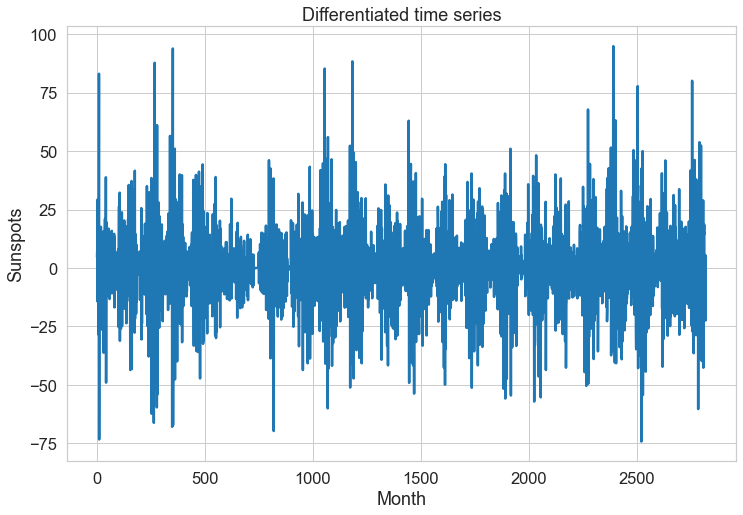

In [310]:
#differencing the time series to remove trend
df_diff = df_date.copy()

df_diff['Sunspots_diff'] = df_diff['Sunspots'] - df_diff['Sunspots'].shift(1)
df_diff.dropna(inplace=True)

ax = df_diff['Sunspots_diff'].plot(figsize=(12,8))
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('Differentiated time series')
plt.show()

In [297]:
print(PhillipsPerron(df_diff['Sunspots'],lags=120))
print('\n',DFGLS(df_diff['Sunspots'],lags=120))
print('\n',ADF(df_diff['Sunspots'],lags=120))
print('\n',KPSS(df_diff['Sunspots'],lags=120))

     Phillips-Perron Test (Z-tau)    
Test Statistic                -10.775
P-value                         0.000
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

       Dickey-Fuller GLS Results      
Test Statistic                 -2.182
P-value                         0.029
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.95 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

    Augmented Dickey-Fuller Results   
Test Statistic                 -2.325
P-value                         0.164
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%

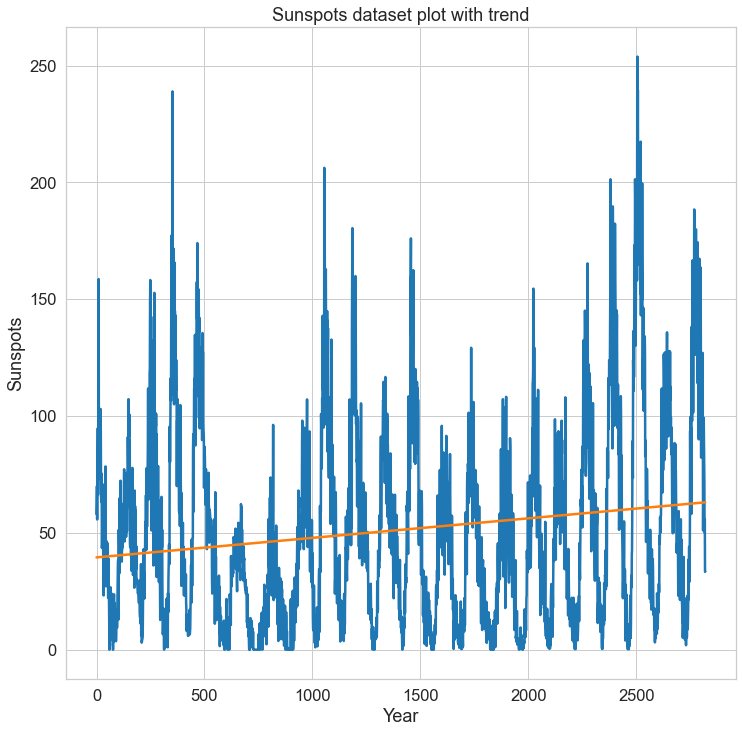

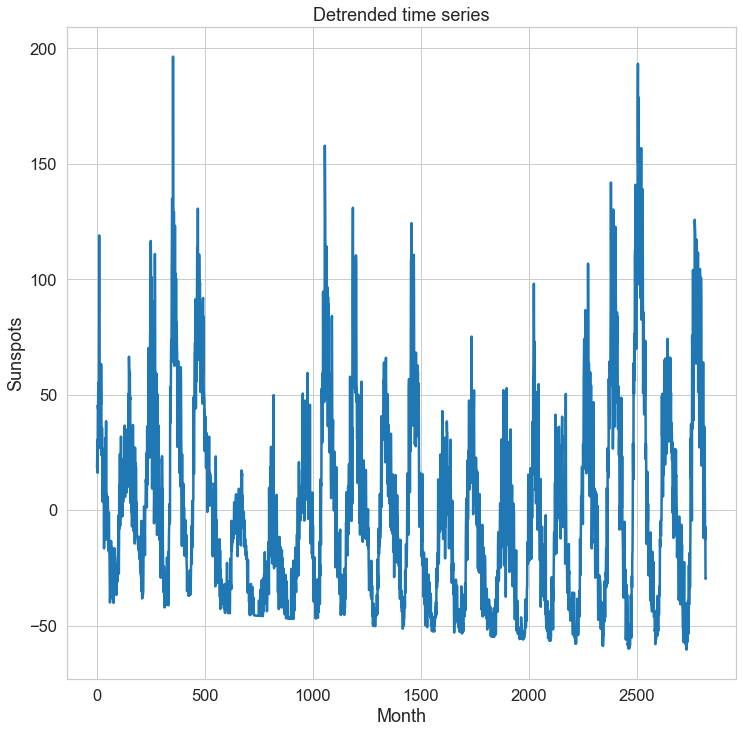

In [309]:
# use a linear model to detrend a time series
from sklearn.linear_model import LinearRegression

df_reg = df_date.copy()
X = [i for i in range(0, len(df_reg['Sunspots']))]
X = np.reshape(X, (len(X), 1))
y = df_reg['Sunspots'].values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
plt.plot(y)
plt.plot(trend)
plt.title('Sunspots dataset plot with trend')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df_reg['Sunspots']))]

# plot detrended
plt.plot(detrended)
plt.title('Detrended time series')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.show()

In [301]:
print(PhillipsPerron(df_reg['Sunspots'],lags=120))
print('\n',DFGLS(df_reg['Sunspots'],lags=120))
print('\n',ADF(df_reg['Sunspots'],lags=120))
print('\n',KPSS(df_reg['Sunspots'],lags=120))

     Phillips-Perron Test (Z-tau)    
Test Statistic                -10.773
P-value                         0.000
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

       Dickey-Fuller GLS Results      
Test Statistic                 -2.302
P-value                         0.021
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.95 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

    Augmented Dickey-Fuller Results   
Test Statistic                 -2.315
P-value                         0.167
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%

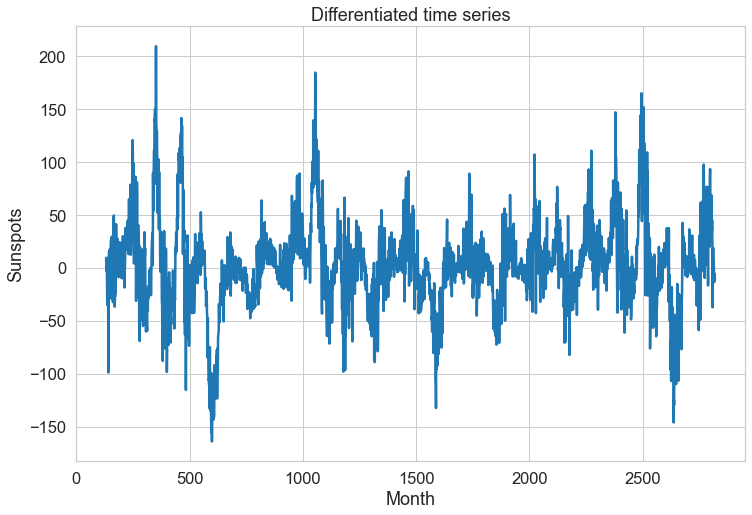

In [564]:
# deseasonalize a time series using differencing
df_des = df_date.copy()
#X = df_deseason['Sunspots'].values
#deseason = list()
#11 years * 12 months per year
period = 11*12

df_des['Sunspots_des'] = df_des['Sunspots'] - df_des['Sunspots'].shift(period)
df_des.dropna(inplace=True)

ax = df_des['Sunspots_des'].plot(figsize=(12,8))
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('Differentiated time series')
plt.show()

In [565]:
print(PhillipsPerron(df_des['Sunspots_des'],lags=120))
print('\n',DFGLS(df_des['Sunspots_des'],lags=120))
print('\n',ADF(df_des['Sunspots_des'],lags=120))
print('\n',KPSS(df_des['Sunspots_des'],lags=120))

     Phillips-Perron Test (Z-tau)    
Test Statistic                -23.467
P-value                         0.000
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

       Dickey-Fuller GLS Results      
Test Statistic                 -4.373
P-value                         0.000
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.95 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

    Augmented Dickey-Fuller Results   
Test Statistic                 -4.881
P-value                         0.000
Lags                              120
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%

###### Data modelling

After removing the seasonal and the trend components of the time series, we can now try to create a model to forecast the passenger counts for the next months. **Since we have transformed our data using the differencing method, after the forecasting, we need to we need to reverse the transformation (or back-transform) to obtain forecasts on the original scale**.

First we split our dataset in training and testing sets. We will use the first 4 years as the training set and the 5th year as the testing set.

We start with a simple average forecast. In this method, "the forecasts of all future values are equal to the average (or “mean”) of the historical data" (HYNDMAN; ATHANASOPOULOS, 2018). We verify that, as the mean absolute scaled error (MASE) is greater than 1, **the average forecast actually performs worse than the naive method** and, therefore, does not adds value.

We can try some ARIMA models too. First, we use an autoregressive (AR) model, where "we forecast the variable of interest using a linear combination of past values of the variable" (HYNDMAN; ATHANASOPOULOS, 2018). An AR model of order 9 is the best fit for the training data. We see that the AR(9) model performs slightly better than the average forecast, but once more the MASE is greater than 1, **so the AR model also performs worse than the naive method**.

The next model we test is a moving average (MA) model. It "uses past forecast errors in a regression-like model" (HYNDMAN; ATHANASOPOULOS, 2018). We create an MA model by using an ARIMA model and setting the order of the AR model the differencing to zero. We verify that a MA model of order 2 is the best fit for the training data. This MA(2) model performs worse than the previous models we tested, **and, therfore, also performs worse than the naive method**, as the MASE is above 1.

Finally, we can try some models the combines AR and MA. We use an ARMA model first, and then test an ARIMA model. The difference between the two is that while the ARMA model only combines autoregression and moving average models, the ARIMA model also uses differencing (HYNDMAN; ATHANASOPOULOS, 2018). We create an ARMA model by using an ARIMA model and setting the order of the differencing to zero, in an analagous way we created the MA model. 

We use two criteria to evaluate the models, the AICc and the MASE. Both cirteria give suggests different orders for the ARMA model: (9,9) and (6,7). esting both models with the test set, we verify that the ARMA(6,7) performs better for all other types of erros, MAE, RMSE, and MAPE. Therefore the best ARMA model for our data have order of the autoregressive part of 6 and order of the moving average part of 7. **However, this model have a MASE of 3.76, better than the previous models tested, but worse than the naive method**.

Regarding the ARIMA model, we can try to use the model directly with our data. We should remove the seasonal component form the data before using the ARIMA model. However, we first try using the ARIMA model directly into our data. We verify that the best ARIMA model for our data has order of the autoregressive part of 2, order of the moving average part of 0, and order of the differencing part 10. As expected, the the model does not perform well with we don't remove the seasonal component of the data. **This model have a MASE of 3.566, performing worse than than the naive method, although a little better thatn the AR, MA, and ARMA models we tried**.

Now, we use the ARIMA model with the deseasonalized data to see how it performs. We verify that the best ARIMA model for the deseasonalized time series has order of the autoregressive part of 8, order of the moving average part of 1, and order of the differencing part 10. **However, this model still does not perform well and, surprisingly, performs worse than the ARIMA models built using the time series without removing the seasonal component**. Nonetheless, it performs better than the other models previoulsy tried.

Therefore, we can now try the Seasonal Autoregressive Integrated Moving Average (SARIMA) method, also called Seasonal ARIMA. It is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA models. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality. The modelling procedure is almost the same as for non-seasonal data, except that we need to select seasonal AR and MA terms as well as the non-seasonal components of the model.

Given the higher computing cost of the SARIMA method, we downsample the dataset from monthly to yearly samples, by taking the mean value the samples in a year as the value of this year sample. After doing this we use the SARIMA in two ways. First, we follow the procedure used for the other methods, and try to find the best parameters to be used in the model through an iteration process. **The result is a SARIMA (3,1,3)(3,1,3)11, which performed much better than the previous methods tested, with a MASE of 2.327**. 

The second way we use the SARIMA method is by trying to identify the parameters to be used in the ACF and PACF plots. The best model is a SARIMA (p,q,d)(P,Q,D)s which performed better than the previous SARIMA model we tested. The significant spike in lag 6 of the PACF suggests a non-seasonal AR(6). The first lag above the significance level at lag 22 in the ACF suggests a non-seasonal MA(22). Besides, the tests we did before suggests that there is some trend, although weak, in the time series. So we adopt d as 1 to include differencing. The exponential decay in the seasonal lags of the ACF suggests a seasonal AR(1). Besides, we assume a D=1. **The result is a SARIMA(6,1,22)(1,1,0). This model performed even better than the previous SARIMA we tested, with a MASE of 2.030. Although this value is still above 1, it is clearly the bes of all the models tested**.

------------------------------------

In [566]:
#X = series.values
train_size_des = int(len(df_des) * 0.7)
train_des, test_des = df_des[0:train_size_des], df_des[train_size_des:len(df_des)]

print(train_des.info(),'\n')
print(test_des.info(),'\n')

train_size = int(len(df_date) * 0.7)
train, test = df_date[0:train_size], df_date[train_size:len(df_date)]

print(train.info(),'\n')
print(test.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 132 to 2012
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1881 non-null   datetime64[ns]
 1   Sunspots      1881 non-null   float64       
 2   Sunspots_des  1881 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 58.8 KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 2013 to 2819
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          807 non-null    datetime64[ns]
 1   Sunspots      807 non-null    float64       
 2   Sunspots_des  807 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.2 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype        

In [567]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 1973 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      847 non-null    datetime64[ns]
 1   Sunspots  847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


In [554]:
pd.set_option('display.max_columns', None)

In [568]:
pd.set_option("max_rows", None)

#forecasting with average method
yhat_avg_des = pd.DataFrame().reindex_like(test)
yhat_avg_des['Date'] = test['Date']
yhat_avg_des['Sunspots_des'] = train_des['Sunspots_des'].mean()

m = (len(df_date) - len(df_des))
ki = test.index.values[0]
kf = ki + m
ji = kf + 1
jf = test_des.index.values[0] + len(test_des)

for i in range(ki,kf+1):
    yhat_avg_des.loc[i,'Sunspots'] = yhat_avg_des.loc[i,'Sunspots_des'] + train_des.loc[i-m,'Sunspots']
   
for i in range(ji,jf):
    yhat_avg_des.loc[i,'Sunspots'] = yhat_avg_des.loc[i,'Sunspots_des'] + yhat_avg_des.loc[i-m,'Sunspots']

yhat_avg_des.head()

,Date,Sunspots,Sunspots_des
1973,1913-06-01,0.76991,-0.63009
1974,1913-07-01,0.26991,-0.63009
1975,1913-08-01,1.66991,-0.63009
1976,1913-09-01,6.96991,-0.63009
1977,1913-10-01,15.66991,-0.63009


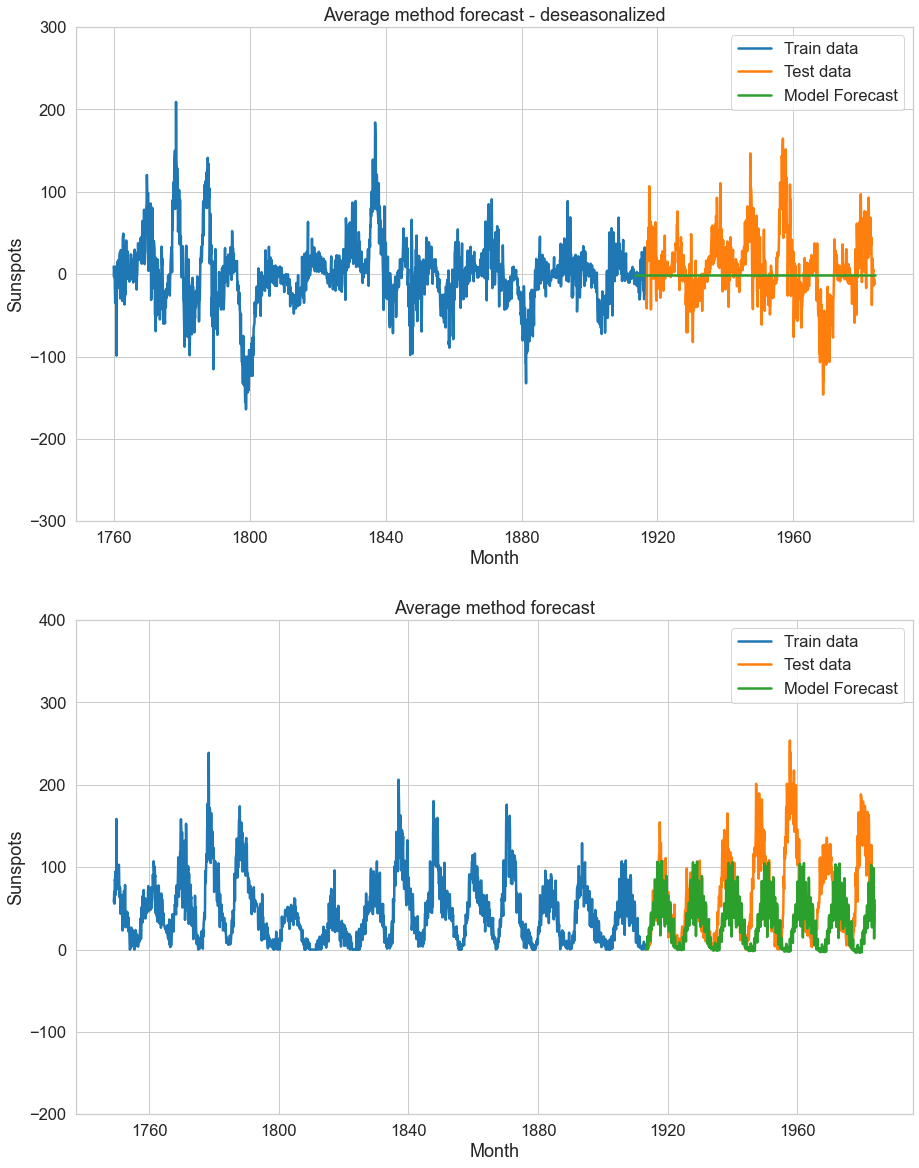

<Figure size 1152x720 with 0 Axes>

In [569]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_des,x='Date',y='Sunspots_des')
ex = sns.lineplot(ax=axes[0],data=test_des,x='Date',y='Sunspots_des')
fx = sns.lineplot(ax=axes[0],data=yhat_avg_des,x='Date',y='Sunspots_des')
axes[0].set(xlabel='Month', ylabel = 'Sunspots')
axes[0].set_title('Average method forecast - deseasonalized')
axes[0].set_ylim(-300,300)
#axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train,x='Date',y='Sunspots')
bx = sns.lineplot(ax=axes[1],data=test,x='Date',y='Sunspots')
cx = sns.lineplot(ax=axes[1],data=yhat_avg_des,x='Date',y='Sunspots')
axes[1].set(xlabel='Month', ylabel = 'Sunspots')
axes[1].set_title('Average method forecast')
axes[1].set_ylim(-200,400)
#axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [570]:
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_percentage_error

def MASE_func(training_series, testing_series, prediction_series):

    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

MAE = median_absolute_error(test['Sunspots'], yhat_avg_des['Sunspots'])
RMSE = mean_squared_error(test['Sunspots'], yhat_avg_des['Sunspots'],squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_avg_des['Sunspots'])
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_avg_des['Sunspots'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=27.370
RMSE=64.769
MAPE=4093700931743.334
MASE=3.912


In [571]:
#find the best order for the AR Model

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

sel = ar_select_order(train_des['Sunspots_des'], maxlag=500, trend='n', old_names=False)
sel.ar_lags
res_ar = sel.model.fit()
print(res_ar.summary())
warnings.filterwarnings("ignore")

                            AutoReg Model Results                             
Dep. Variable:           Sunspots_des   No. Observations:                 1881
Model:                     AutoReg(9)   Log Likelihood               -8310.750
Method:               Conditional MLE   S.D. of innovations             20.503
Date:                Thu, 27 May 2021   AIC                              6.052
Time:                        10:51:58   BIC                              6.081
Sample:                             9   HQIC                             6.063
                                 1881                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sunspots_des.L1     0.5359      0.023     23.282      0.000       0.491       0.581
Sunspots_des.L2     0.1286      0.026      4.924      0.000       0.077       0.180
Sunspots_des.L3     0.0331      

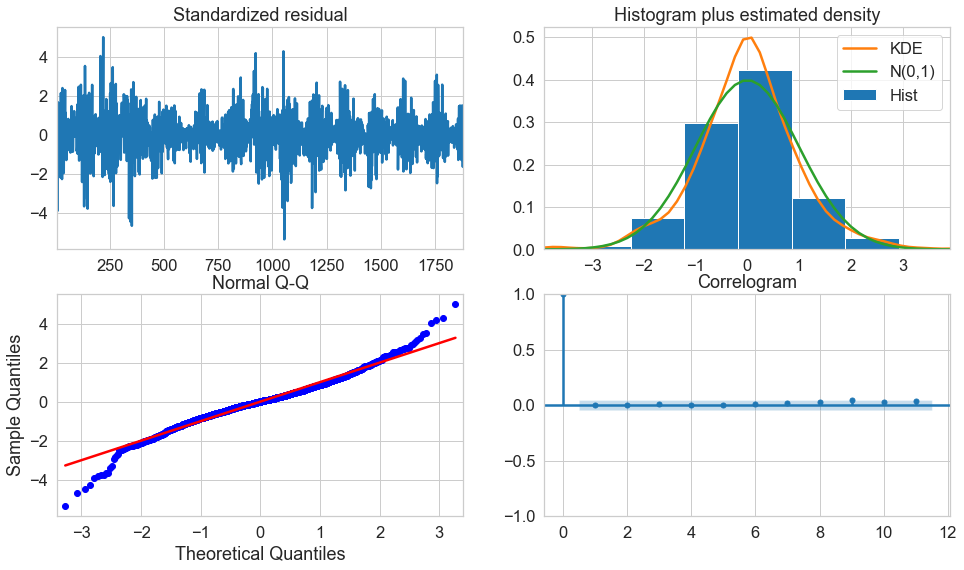

In [572]:
fig = plt.figure(figsize=(16,9))
fig = res_ar.plot_diagnostics(lags=11, fig=fig)

In [573]:
yhat_AR = res_ar.predict(start=len(train_des['Sunspots_des'])+1, end=(len(df_date)), dynamic=False)

yhat_AR_des = pd.DataFrame().reindex_like(test)
yhat_AR_des['Sunspots_des'] = yhat_AR
yhat_AR_des['Date'] = test['Date']

m = (len(df_date) - len(df_des))
ki = test.index.values[0]
kf = ki + m
ji = kf + 1
jf = test_des.index.values[0] + len(test_des)

for i in range(ki,kf+1):
    yhat_AR_des.loc[i,'Sunspots'] = yhat_AR_des.loc[i,'Sunspots_des'] + train_des.loc[i-m,'Sunspots']

for i in range(ji,jf):
    yhat_AR_des.loc[i,'Sunspots'] = yhat_AR_des.loc[i,'Sunspots_des'] + yhat_avg_des.loc[i-m,'Sunspots']

yhat_AR_des.head()

,Date,Sunspots,Sunspots_des
1973,1913-06-01,0.802777,-0.597223
1974,1913-07-01,0.316633,-0.583367
1975,1913-08-01,1.730167,-0.569833
1976,1913-09-01,7.043387,-0.556613
1977,1913-10-01,15.756301,-0.543699


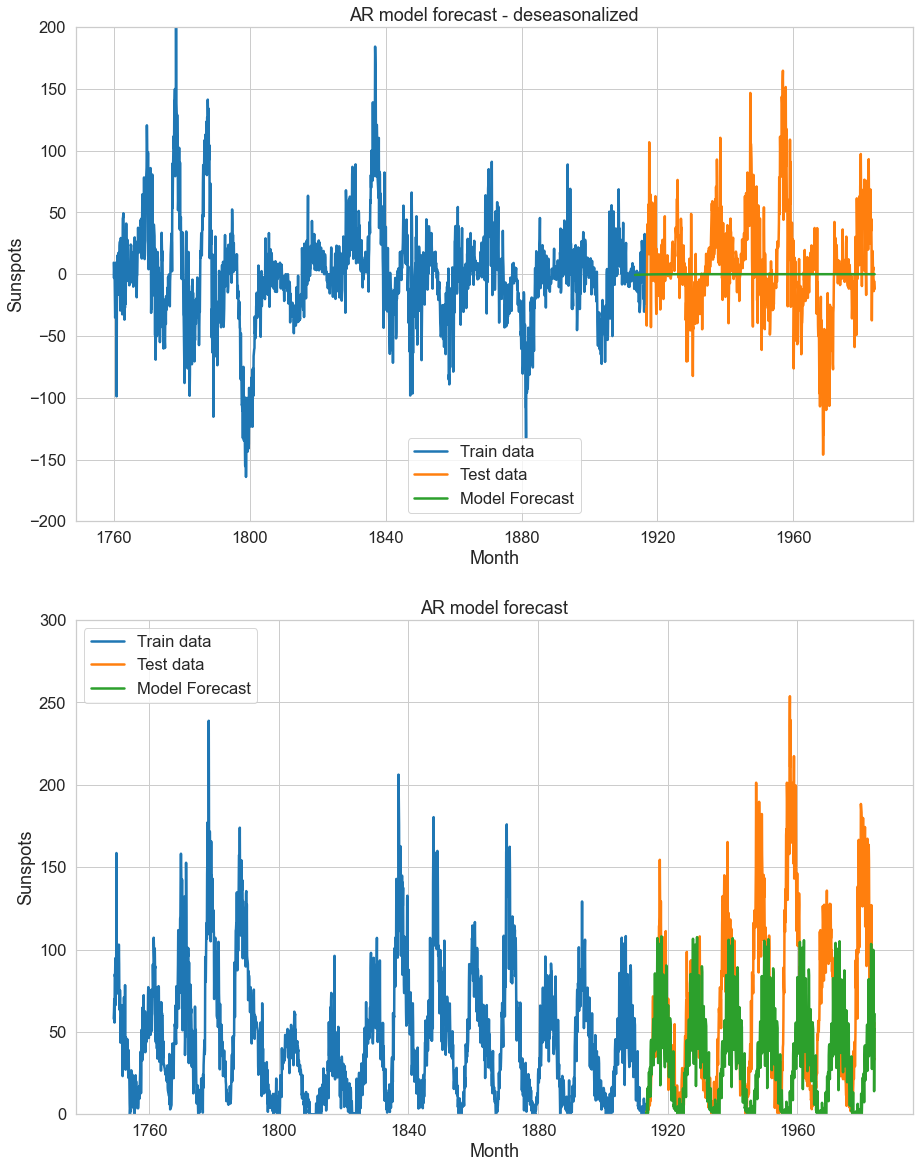

<Figure size 1152x720 with 0 Axes>

In [574]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_des,x='Date',y='Sunspots_des')
ex = sns.lineplot(ax=axes[0],data=test_des,x='Date',y='Sunspots_des')
fx = sns.lineplot(ax=axes[0],data=yhat_AR_des,x='Date',y='Sunspots_des')
axes[0].set(xlabel='Month', ylabel = 'Sunspots')
axes[0].set_title('AR model forecast - deseasonalized')
axes[0].set_ylim(-200,200)
#axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train,x='Date',y='Sunspots')
bx = sns.lineplot(ax=axes[1],data=test,x='Date',y='Sunspots')
cx = sns.lineplot(ax=axes[1],data=yhat_AR_des,x='Date',y='Sunspots')
axes[1].set(xlabel='Month', ylabel = 'Sunspots')
axes[1].set_title('AR model forecast')
axes[1].set_ylim(0,300)
#axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [575]:
MAE = median_absolute_error(test['Sunspots'], yhat_AR_des['Sunspots'])
RMSE = mean_squared_error(test['Sunspots'], yhat_AR_des['Sunspots'],squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_AR_des['Sunspots'])
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_AR_des['Sunspots'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=27.240
RMSE=64.443
MAPE=4268459501193.259
MASE=3.890


In [576]:
#find the best order for the MA Model

from statsmodels.tsa.arima.model import ARIMA

MA = pd.DataFrame(columns=['order','MAE','RMSE','MAPE','MASE'])
for i in range(16):
    MA_model = ARIMA(train_des['Sunspots_des'], order=(0, 0, i))
    res_MA = MA_model.fit()
    yhat_MA = res_MA.predict(start=len(train_des['Sunspots_des'])+1, end=(len(df_date)), dynamic=False)
    try:
        MAE = median_absolute_error(train_des['Sunspots_des'], yhat_MA)
    except:
        pass
    try:
        RMSE = mean_squared_error(train_des['Sunspots_des'], yhat_MA,squared=False)
    except:
        pass 
    try:
        MAPE = mean_absolute_percentage_error(train_des['Sunspots_des'], yhat_MA)
    except:
        pass     
    try:
        MASE = MASE_func(train_des['Sunspots_des'],test_des['Sunspots_des'],yhat_MA)
    except:
        pass            
    MA2 = pd.Series([i,MAE,RMSE,MAPE,MASE], index=MA.columns )
    #MA2 = pd.DataFrame([[i,MAE,RMSE,MAPE,MASE]])
    MA = MA.append(MA2,ignore_index=True)
    #print(MA)
#warnings.filterwarnings("ignore")
MA

,order,MAE,RMSE,MAPE,MASE
0,0.0,27.239992,64.443314,4.268460e+12,1.762727
1,1.0,27.239992,64.443314,4.268460e+12,1.762721
2,2.0,27.239992,64.443314,4.268460e+12,1.762713
3,3.0,27.239992,64.443314,4.268460e+12,1.762715
4,4.0,27.239992,64.443314,4.268460e+12,1.762726
5,5.0,27.239992,64.443314,4.268460e+12,1.762728
6,6.0,27.239992,64.443314,4.268460e+12,1.762729
7,7.0,27.239992,64.443314,4.268460e+12,1.762732
8,8.0,27.239992,64.443314,4.268460e+12,1.762735
9,9.0,27.239992,64.443314,4.268460e+12,1.762738


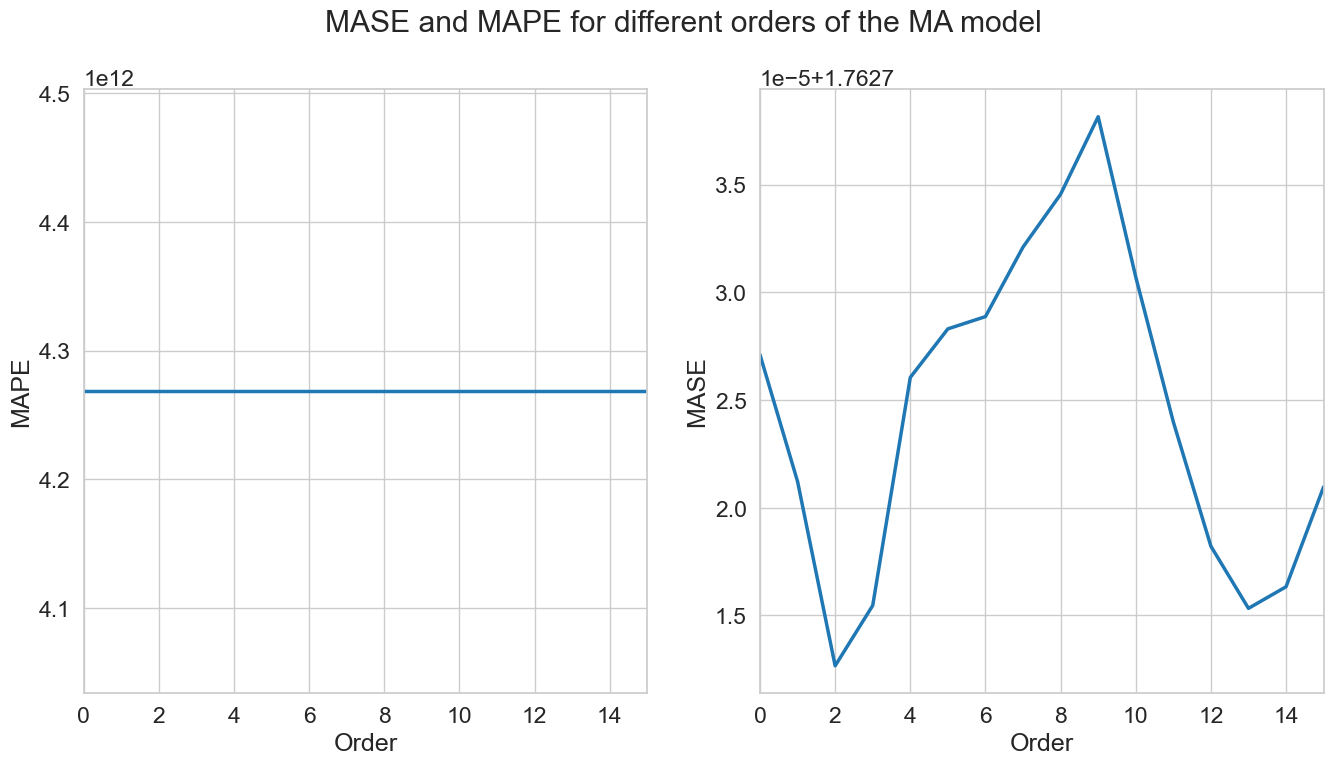

In [577]:
fig_MA, axes = plt.subplots(1,2,figsize=(16,8), dpi= 100)
fig_MA.suptitle('MASE and MAPE for different orders of the MA model')

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(data=MA['MAPE'], ax=axes[0])
#ax.set_xticks(np.arange(0, 60 + 1, 1))
axes[0].set(xlabel='Order', ylabel = 'MAPE')
axes[0].set_xlim(0,15)

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(data=MA['MASE'], ax=axes[1])
#ax.set_xticks(np.arange(0, 60 + 1, 1))
axes[1].set(xlabel='Order', ylabel = 'MASE')
axes[1].set_xlim(0,15)

plt.show()

In [578]:
print('Minimum ',MA[['MAE']].idxmin())
print('Minimum ',MA[['RMSE']].idxmin())
print('Minimum ',MA[['MAPE']].idxmin())
print('Minimum ',MA[['MASE']].idxmin())

Minimum  MAE    0
dtype: int64
Minimum  RMSE    0
dtype: int64
Minimum  MAPE    0
dtype: int64
Minimum  MASE    2
dtype: int64


In [580]:
from statsmodels.tsa.arima.model import ARIMAResults

MA_model = ARIMA(train_des['Sunspots_des'], order=(0, 0, 2))
res_MA = MA_model.fit()

print(res_MA.summary())

warnings.filterwarnings("ignore")

                               SARIMAX Results                                
Dep. Variable:           Sunspots_des   No. Observations:                 1881
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -8813.617
Date:                Thu, 27 May 2021   AIC                          17635.233
Time:                        10:54:35   BIC                          17657.392
Sample:                             0   HQIC                         17643.395
                               - 1881                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6288      1.314     -0.479      0.632      -3.204       1.946
ma.L1          0.7346      0.017     43.356      0.000       0.701       0.768
ma.L2          0.4266      0.017     25.773      0.0

In [581]:
yhat_MA = res_MA.predict(start=len(train_des['Sunspots_des'])+1, end=(len(df_date)), dynamic=False)

yhat_MA_des = pd.DataFrame().reindex_like(test)
yhat_MA_des['Sunspots_des'] = yhat_MA
yhat_MA_des['Date'] = test['Date']

m = (len(df_date) - len(df_des))
ki = test.index.values[0]
kf = ki + m
ji = kf + 1
jf = test_des.index.values[0] + len(test_des)

for i in range(ki,kf+1):
    yhat_MA_des.loc[i,'Sunspots'] = yhat_MA_des.loc[i,'Sunspots_des'] + train_des.loc[i-m,'Sunspots']

for i in range(ji,jf):
    yhat_MA_des.loc[i,'Sunspots'] = yhat_MA_des.loc[i,'Sunspots_des'] + yhat_MA_des.loc[i-m,'Sunspots']

yhat_MA_des.head()

132 1973 2105 2106 2820


,Date,Sunspots,Sunspots_des
1973,1913-06-01,0.771242,-0.628758
1974,1913-07-01,0.271242,-0.628758
1975,1913-08-01,1.671242,-0.628758
1976,1913-09-01,6.971242,-0.628758
1977,1913-10-01,15.671242,-0.628758


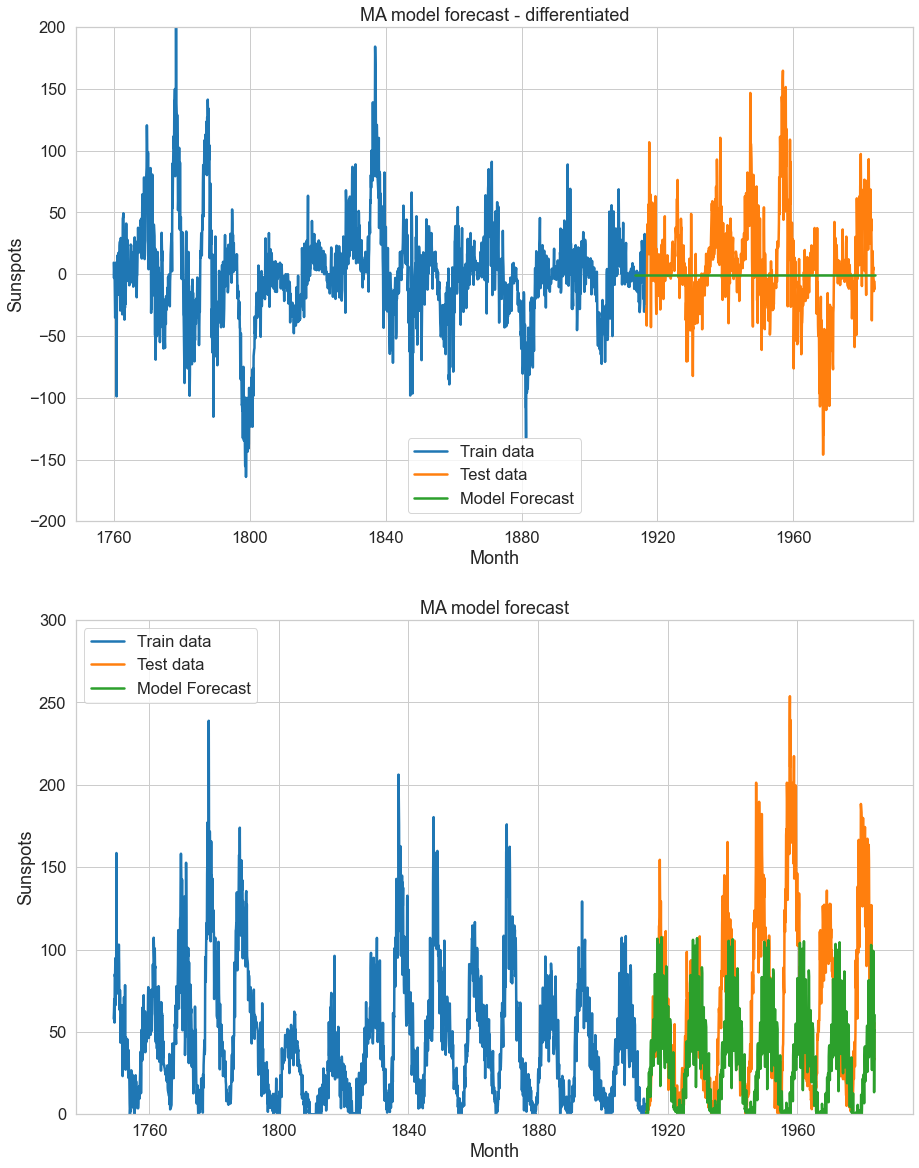

<Figure size 1152x720 with 0 Axes>

In [582]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_des,x='Date',y='Sunspots_des')
ex = sns.lineplot(ax=axes[0],data=test_des,x='Date',y='Sunspots_des')
fx = sns.lineplot(ax=axes[0],data=yhat_MA_des,x='Date',y='Sunspots_des')
axes[0].set(xlabel='Month', ylabel = 'Sunspots')
axes[0].set_title('MA model forecast - differentiated')
axes[0].set_ylim(-200,200)
#axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train,x='Date',y='Sunspots')
bx = sns.lineplot(ax=axes[1],data=test,x='Date',y='Sunspots')
cx = sns.lineplot(ax=axes[1],data=yhat_MA_des,x='Date',y='Sunspots')
axes[1].set(xlabel='Month', ylabel = 'Sunspots')
axes[1].set_title('MA model forecast')
axes[1].set_ylim(0,300)
#axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [583]:
MAE = median_absolute_error(test['Sunspots'], yhat_MA_des['Sunspots'])
RMSE = mean_squared_error(test['Sunspots'], yhat_MA_des['Sunspots'],squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_MA_des['Sunspots'])
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_MA_des['Sunspots'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=27.371
RMSE=64.766
MAPE=4100782867938.119
MASE=3.911


In [436]:
# calculate AICc from AIC
def calculate_AICc(train, arma_order):
    model = ARIMA(train, order=arma_order)
    model_fit = model.fit()
    aic = model_fit.aic
    parameters = sum(arma_order)
    T = len(train)
    aicc = aic+(2*(parameters+2)*(parameters+3))/(T-(parameters+3))
    return aicc  

In [437]:
# evaluate an ARIMA model for a given order (p,d,q)
  
# evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_ARIMA(train, test, p_values, d_values, q_values, matriz):
    best_aicc, best_mase, best_order_aicc, best_order_mase = float("inf"),float("inf"), None, None
    k_i = train.index.values[0] + len(train)
    k_f = k_i + len(test) - 1
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    #calculate aicc
                    aicc = calculate_AICc(train, order)
                    if aicc < best_aicc:
                        best_aicc, best_order_aicc = aicc, (p,d,q)


                    #calculate MASE
                    model_ = ARIMA(train, order=(p,d,q))
                    res_ = model_.fit()
                    yhat_ = res_.predict(start=k_i, end=k_f, dynamic=False)
                    mase = MASE_func(train,test,yhat_)
                    if mase < best_mase:
                        best_mase, best_order_mase = mase, (p,d,q)                
                
                    #store values
                    matriz2 = pd.Series([order,aicc,mase], index=matriz.columns)
                    matriz = matriz.append(matriz2,ignore_index=True)
                except:
                    continue
    print('Best ARIMA%s AICc=%.3f' % (best_order_aicc, best_aicc))
    print('Best ARIMA%s MASE=%.3f' % (best_order_mase, best_mase))
    return matriz

In [754]:
#ARMA model
p_values = range(11)
d_values = range(0,1)
q_values = range(11)
ARMA = pd.DataFrame(columns=['order','AICc','MASE'])
ARMA1 = evaluate_ARIMA(train_des['Sunspots_des'],test_des['Sunspots_des'] , p_values, d_values, q_values,ARMA)
warnings.filterwarnings("ignore")
ARMA1.head()

Best ARIMA(9, 0, 9) AICc=16677.312
Best ARIMA(6, 0, 7) MASE=1.754


,order,AICc,MASE
0,"(0, 0, 0)",19250.996404,1.762727
1,"(0, 0, 1)",18135.914577,1.762721
2,"(0, 0, 2)",17635.254620,1.762713
3,"(0, 0, 3)",17389.177556,1.762715
4,"(0, 0, 4)",17256.315107,1.762726


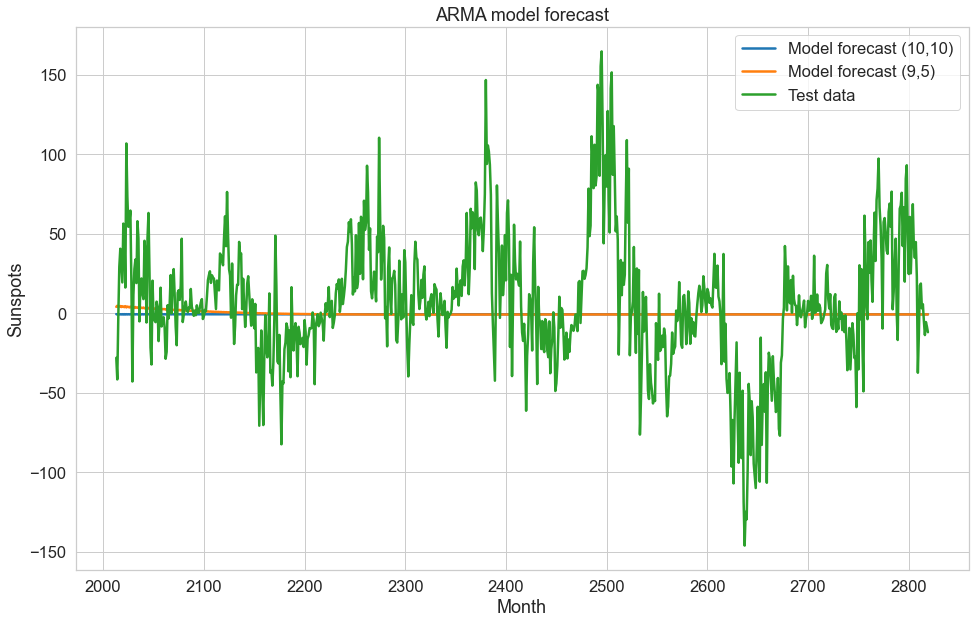

In [585]:
k_i = train_des.index.values[0] + len(train_des)
k_f = k_i + len(test_des) - 1

ARMA_model = ARIMA(train_des['Sunspots_des'], order=(9, 0, 9))
res_ARMA = ARMA_model.fit()
yhat_ARMA = res_ARMA.predict(start=k_i, end=k_f, dynamic=False)

ARMA_model2 = ARIMA(train_des['Sunspots_des'], order=(6, 0, 7))
res_ARMA2 = ARMA_model2.fit()
yhat_ARMA2 = res_ARMA2.predict(start=k_i, end=k_f, dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARMA)
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('ARMA model forecast')
#ax.set_xlim(49,60)
bx = sns.lineplot(data=yhat_ARMA2)
cx = sns.lineplot(data=test_des['Sunspots_des'])
plt.legend(labels=["Model forecast (9,9)", "Model forecast (6,7)","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [586]:
MAE = median_absolute_error(test_des['Sunspots_des'], yhat_ARMA)
RMSE = mean_squared_error(test_des['Sunspots_des'], yhat_ARMA,squared=False)
MAPE = mean_absolute_percentage_error(test_des['Sunspots_des'], yhat_ARMA)
MASE = MASE_func(train_des['Sunspots_des'],test_des['Sunspots_des'],yhat_ARMA)
print("ARMA(9,9):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE = median_absolute_error(test_des['Sunspots_des'], yhat_ARMA2)
RMSE = mean_squared_error(test_des['Sunspots_des'], yhat_ARMA2,squared=False)
MAPE = mean_absolute_percentage_error(test_des['Sunspots_des'], yhat_ARMA2)
MASE = MASE_func(train_des['Sunspots_des'],test_des['Sunspots_des'],yhat_ARMA2)
print("\nARMA(6,5):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

ARMA(10,10):
MAE=20.530
RMSE=41.069
MAPE=10864787096303.293
MASE=1.763

ARMA(9,5):
MAE=20.383
RMSE=40.948
MAPE=21453196409851.930
MASE=1.754


In [589]:
yhat_ARMA = res_ARMA2.predict(start=len(train_des['Sunspots_des'])+1, end=(len(df_date)), dynamic=False)

yhat_ARMA_des = pd.DataFrame().reindex_like(test)
yhat_ARMA_des['Sunspots_des'] = yhat_ARMA
yhat_ARMA_des['Date'] = test['Date']

m = (len(df_date) - len(df_des))
ki = test.index.values[0]
kf = ki + m
ji = kf + 1
jf = test_des.index.values[0] + len(test_des)

for i in range(ki,kf+1):
    yhat_ARMA_des.loc[i,'Sunspots'] = yhat_ARMA_des.loc[i,'Sunspots_des'] + train_des.loc[i-m,'Sunspots']

for i in range(ji,jf):
    yhat_ARMA_des.loc[i,'Sunspots'] = yhat_ARMA_des.loc[i,'Sunspots_des'] + yhat_ARMA_des.loc[i-m,'Sunspots']

yhat_ARMA_des.head()


,Date,Sunspots,Sunspots_des
1973,1913-06-01,7.672800,6.272800
1974,1913-07-01,5.666081,4.766081
1975,1913-08-01,7.907883,5.607883
1976,1913-09-01,13.272704,5.672704
1977,1913-10-01,21.134699,4.834699


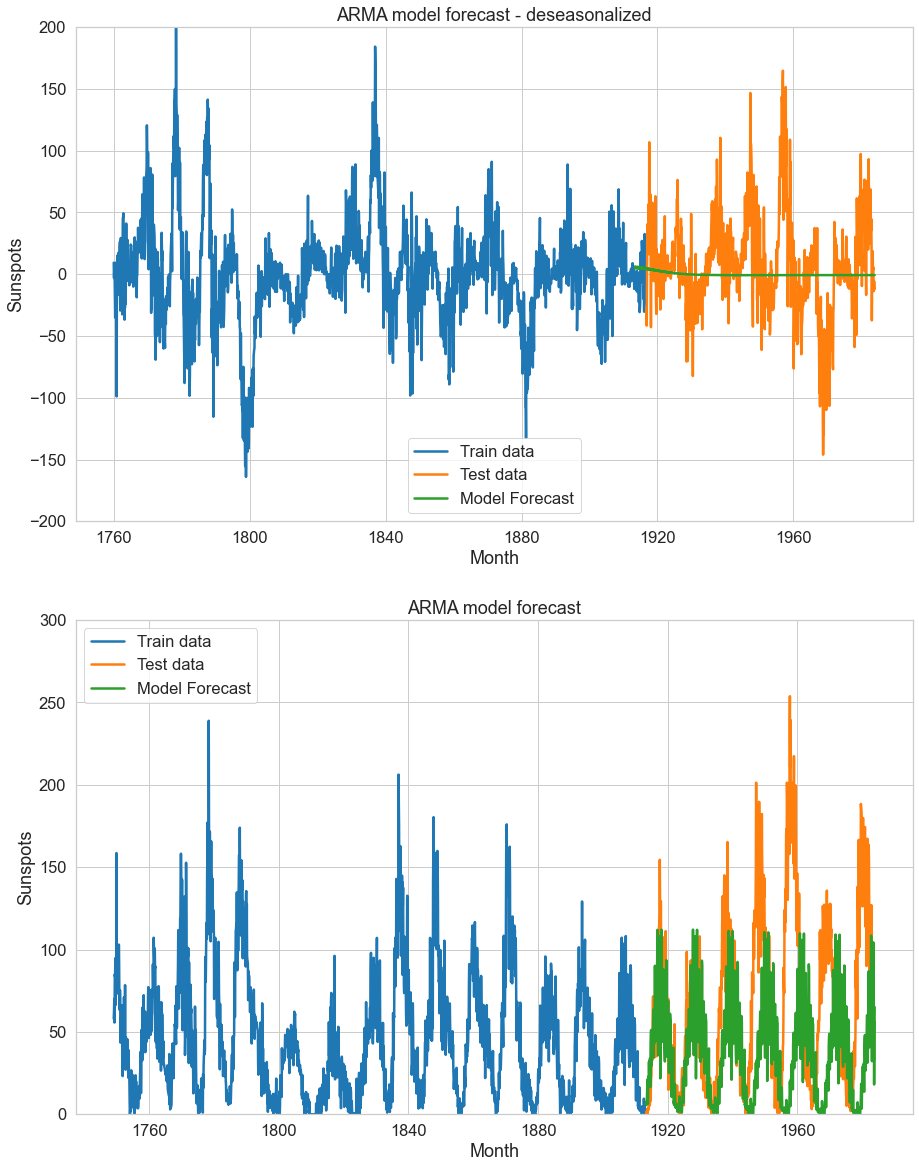

<Figure size 1152x720 with 0 Axes>

In [590]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_des,x='Date',y='Sunspots_des')
ex = sns.lineplot(ax=axes[0],data=test_des,x='Date',y='Sunspots_des')
fx = sns.lineplot(ax=axes[0],data=yhat_ARMA_des,x='Date',y='Sunspots_des')
axes[0].set(xlabel='Month', ylabel = 'Sunspots')
axes[0].set_title('ARMA model forecast - deseasonalized')
axes[0].set_ylim(-200,200)
#axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train,x='Date',y='Sunspots')
bx = sns.lineplot(ax=axes[1],data=test,x='Date',y='Sunspots')
cx = sns.lineplot(ax=axes[1],data=yhat_ARMA_des,x='Date',y='Sunspots')
axes[1].set(xlabel='Month', ylabel = 'Sunspots')
axes[1].set_title('ARMA model forecast')
axes[1].set_ylim(0,300)
#axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [591]:
MAE = median_absolute_error(test['Sunspots'], yhat_ARMA_des['Sunspots'])
RMSE = mean_squared_error(test['Sunspots'], yhat_ARMA_des['Sunspots'],squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_ARMA_des['Sunspots'])
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_ARMA_des['Sunspots'])

print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=26.302
RMSE=62.162
MAPE=40797186697966.148
MASE=3.757


In [481]:
# evaluate an ARIMA model for a given order (p,d,q)

#ARIMA model
p_values = [0,1,2,4,8,10]
d_values = range(0,3)
q_values = [0,1,2,4,8,10]
ARIMA1 = pd.DataFrame(columns=['order','AICc','MASE'])
ARIMA2 = evaluate_ARIMA(train['Sunspots'],test['Sunspots'] , p_values, d_values, q_values,ARIMA1)
warnings.filterwarnings("ignore")
ARIMA2.head()

Best ARIMA(2, 0, 10) AICc=16219.267
Best ARIMA(2, 0, 10) MASE=3.566


,order,AICc,MASE
0,"(0, 0, 0)",19945.563487,3.689339
1,"(0, 0, 1)",18486.699557,3.687354
2,"(0, 0, 2)",17781.477388,3.685765
3,"(0, 0, 4)",17184.809249,3.682556
4,"(0, 0, 8)",16766.361739,3.675831


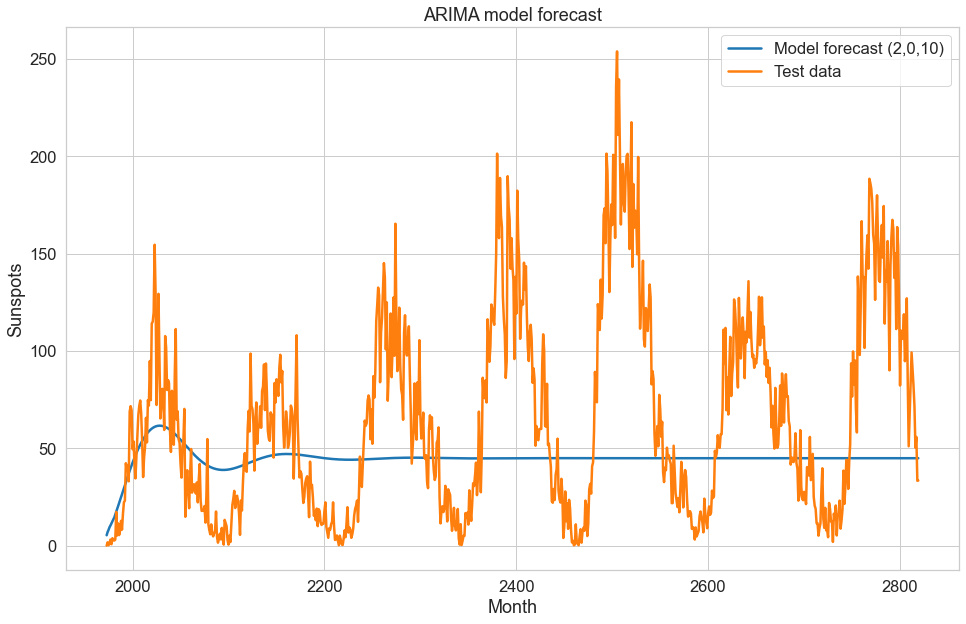

In [483]:
k_i = train.index.values[0] + len(train)
k_f = k_i + len(test) - 1

ARIMA_model = ARIMA(train['Sunspots'], order=(2, 0, 10))
res_ARIMA = ARIMA_model.fit()
yhat_ARIMA = res_ARIMA.predict(start=k_i, end=k_f, dynamic=False)

'''ARIMA_model2 = ARIMA(train['Sunspots'], order=(8, 2, 10))
res_ARIMA2 = ARIMA_model2.fit()
yhat_ARIMA2 = res_ARIMA2.predict(start=k_i, end=k_f, dynamic=False)'''

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARIMA)
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('ARIMA model forecast')
#ax.set_xlim(49,60)
#bx = sns.lineplot(data=yhat_ARIMA2)
cx = sns.lineplot(data=test['Sunspots'])
plt.legend(labels=["Model forecast (2,0,10)","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [486]:

'''MAE = median_absolute_error(test['Sunspots'], yhat_ARIMA2)
RMSE = mean_squared_error(test['Sunspots'], yhat_ARIMA2,squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_ARIMA2)
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_ARIMA2)
print("\nARIMA(8,2,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)'''

MAE = median_absolute_error(test['Sunspots'], yhat_ARIMA)
RMSE = mean_squared_error(test['Sunspots'], yhat_ARIMA,squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_ARIMA)
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_ARIMA)
print("ARIMA(2,0,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

ARIMA(2,0,10):
MAE=31.393
RMSE=54.643
MAPE=28251642075188.902
MASE=3.566


In [592]:
# evaluate an ARIMA model for a given order (p,d,q)

#ARIMA model
p_values = [0,1,2,4,8,10]
d_values = range(0,3)
q_values = [0,1,2,4,8,10]
ARIMA3 = pd.DataFrame(columns=['order','AICc','MASE'])
ARIMA4 = evaluate_ARIMA(train_des['Sunspots_des'],test_des['Sunspots_des'] , p_values, d_values, q_values,ARIMA3)
warnings.filterwarnings("ignore")
ARIMA4.head()

Best ARIMA(4, 2, 4) AICc=18.167
Best ARIMA(4, 2, 4) MASE=1.756


,order,AICc,MASE
0,"(0, 0, 0)",19250.996404,1.762727
1,"(0, 0, 1)",18135.914577,1.762721
2,"(0, 0, 2)",17635.254620,1.762713
3,"(0, 0, 4)",17256.315107,1.762726
4,"(0, 0, 8)",17010.682769,1.762735


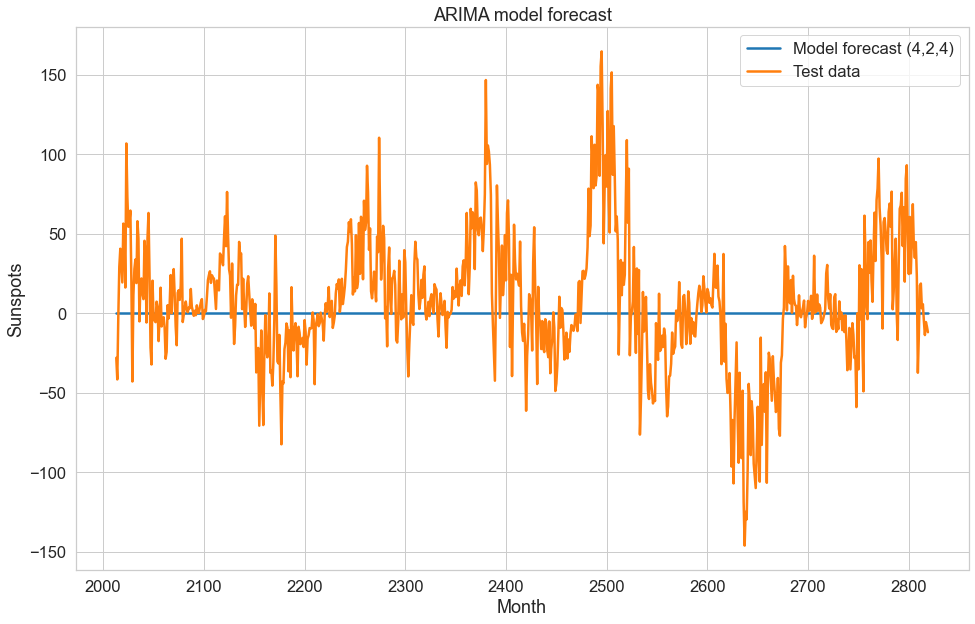

In [604]:
k_i = train_des.index.values[0] + len(train_des)
k_f = k_i + len(test_des) - 1

ARIMA_model3 = ARIMA(train_des['Sunspots_des'], order=(4, 2, 4))
res_ARIMA3 = ARIMA_model3.fit()
yhat_ARIMA3 = res_ARIMA3.predict(start=k_i, end=k_f, dynamic=False)

'''ARIMA_model4 = ARIMA(train_des['Sunspots_des'], order=(4, 2, 4))
res_ARIMA4 = ARIMA_model4.fit()
yhat_ARIMA4 = res_ARIMA4.predict(start=k_i, end=k_f, dynamic=False)'''

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARIMA3)
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('ARIMA model forecast')
#ax.set_xlim(49,60)
#bx = sns.lineplot(data=yhat_ARIMA4)
cx = sns.lineplot(data=test_des['Sunspots_des'])
plt.legend(labels=["Model forecast (4,2,4)", "Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [595]:

'''MAE = median_absolute_error(test_des['Sunspots_des'], yhat_ARIMA4)
RMSE = mean_squared_error(test_des['Sunspots_des'], yhat_ARIMA4,squared=False)
MAPE = mean_absolute_percentage_error(test_des['Sunspots_des'], yhat_ARIMA4)
MASE = MASE_func(train_des['Sunspots_des'],test_des['Sunspots_des'],yhat_ARIMA4)
print("\nARIMA(8,1,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)'''

MAE = median_absolute_error(test_des['Sunspots_des'], yhat_ARIMA3)
RMSE = mean_squared_error(test_des['Sunspots'], yhat_ARIMA3,squared=False)
MAPE = mean_absolute_percentage_error(test_des['Sunspots_des'], yhat_ARIMA3)
MASE = MASE_func(train_des['Sunspots_des'],test_des['Sunspots_des'],yhat_ARIMA3)
print("ARIMA(4,2,4):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)


ARIMA(4,2,4):
MAE=20.600
RMSE=84.962
MAPE=0.996
MASE=1.756


In [753]:
yhat_ARIMA5 = res_ARIMA3.predict(start=len(train_des['Sunspots_des'])+1, end=(len(df_date)), dynamic=False)

yhat_ARIMA_des = pd.DataFrame().reindex_like(test)
yhat_ARIMA_des['Sunspots_des'] = yhat_ARIMA5
yhat_ARIMA_des['Date'] = test['Date']

m = (len(df_date) - len(df_des))
ki = test.index.values[0]
kf = ki + m
ji = kf + 1
jf = test_des.index.values[0] + len(test_des)

for i in range(ki,kf+1):
    yhat_ARIMA_des.loc[i,'Sunspots'] = yhat_ARIMA_des.loc[i,'Sunspots_des'] + train_des.loc[i-m,'Sunspots']

for i in range(ji,jf):
    yhat_ARIMA_des.loc[i,'Sunspots'] = yhat_ARIMA_des.loc[i,'Sunspots_des'] + yhat_ARMA_des.loc[i-m,'Sunspots']

yhat_ARIMA_des.head()

,Date,Sunspots,Sunspots_des
1973,1913-06-01,1.4,0.0
1974,1913-07-01,0.9,0.0
1975,1913-08-01,2.3,0.0
1976,1913-09-01,7.6,0.0
1977,1913-10-01,16.3,0.0


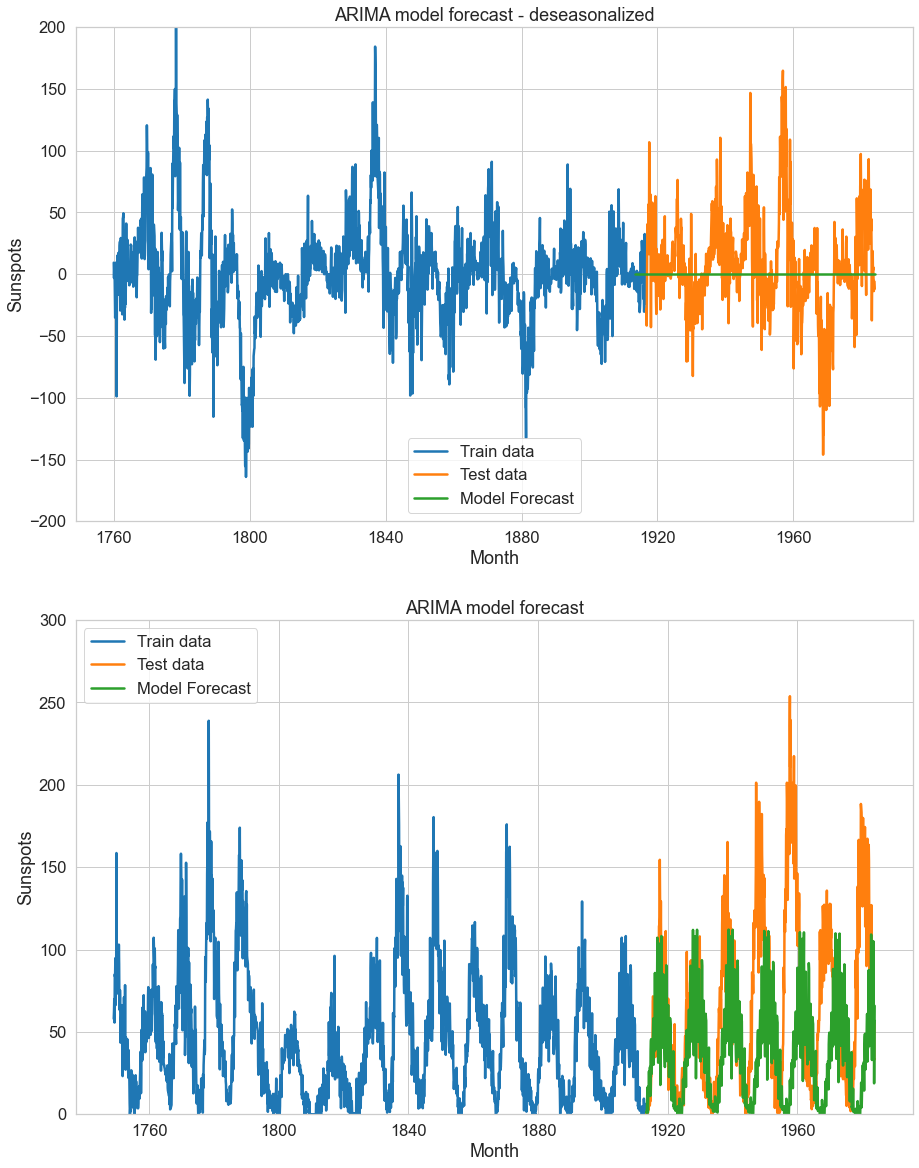

<Figure size 1152x720 with 0 Axes>

In [608]:
fig, axes = plt.subplots(2,1, figsize=(15, 20))

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dx = sns.lineplot(ax=axes[0],data=train_des,x='Date',y='Sunspots_des')
ex = sns.lineplot(ax=axes[0],data=test_des,x='Date',y='Sunspots_des')
fx = sns.lineplot(ax=axes[0],data=yhat_ARIMA_des,x='Date',y='Sunspots_des')
axes[0].set(xlabel='Month', ylabel = 'Sunspots')
axes[0].set_title('ARIMA model forecast - deseasonalized')
axes[0].set_ylim(-200,200)
#axes[0].set_xticks(np.arange(0, 36 + 1, 6))
axes[0].legend(labels=["Train data","Test data","Model Forecast"])

ax = sns.lineplot(ax=axes[1],data=train,x='Date',y='Sunspots')
bx = sns.lineplot(ax=axes[1],data=test,x='Date',y='Sunspots')
cx = sns.lineplot(ax=axes[1],data=yhat_ARIMA_des,x='Date',y='Sunspots')
axes[1].set(xlabel='Month', ylabel = 'Sunspots')
axes[1].set_title('ARIMA model forecast')
axes[1].set_ylim(0,300)
#axes[1].set_xticks(np.arange(0, 36 + 1, 6))
axes[1].legend(labels=["Train data","Test data","Model Forecast"])

plt.show()

In [609]:
MAE = median_absolute_error(test['Sunspots'], yhat_ARIMA_des['Sunspots'])
RMSE = mean_squared_error(test['Sunspots'], yhat_ARIMA_des['Sunspots'],squared=False)
MAPE = mean_absolute_percentage_error(test['Sunspots'], yhat_ARIMA_des['Sunspots'])
MASE = MASE_func(train['Sunspots'],test['Sunspots'],yhat_ARIMA_des['Sunspots'])

print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=26.489
RMSE=61.874
MAPE=7443966326233.635
MASE=3.740


In [825]:
train_sarimax = train.copy().set_index(['Date'])
train_sarimax.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1973 entries, 1749-01-01 to 1913-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sunspots  1973 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1973 non-null   datetime64[ns]
 1   Sunspots  1973 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.0 KB


In [826]:
df_sar = anual_mean.set_index(['Date'])
train_size = int(len(df_sar) * 0.7)
train_sar, test_sar = df_sar[0:train_size], df_sar[train_size:len(df_date)]

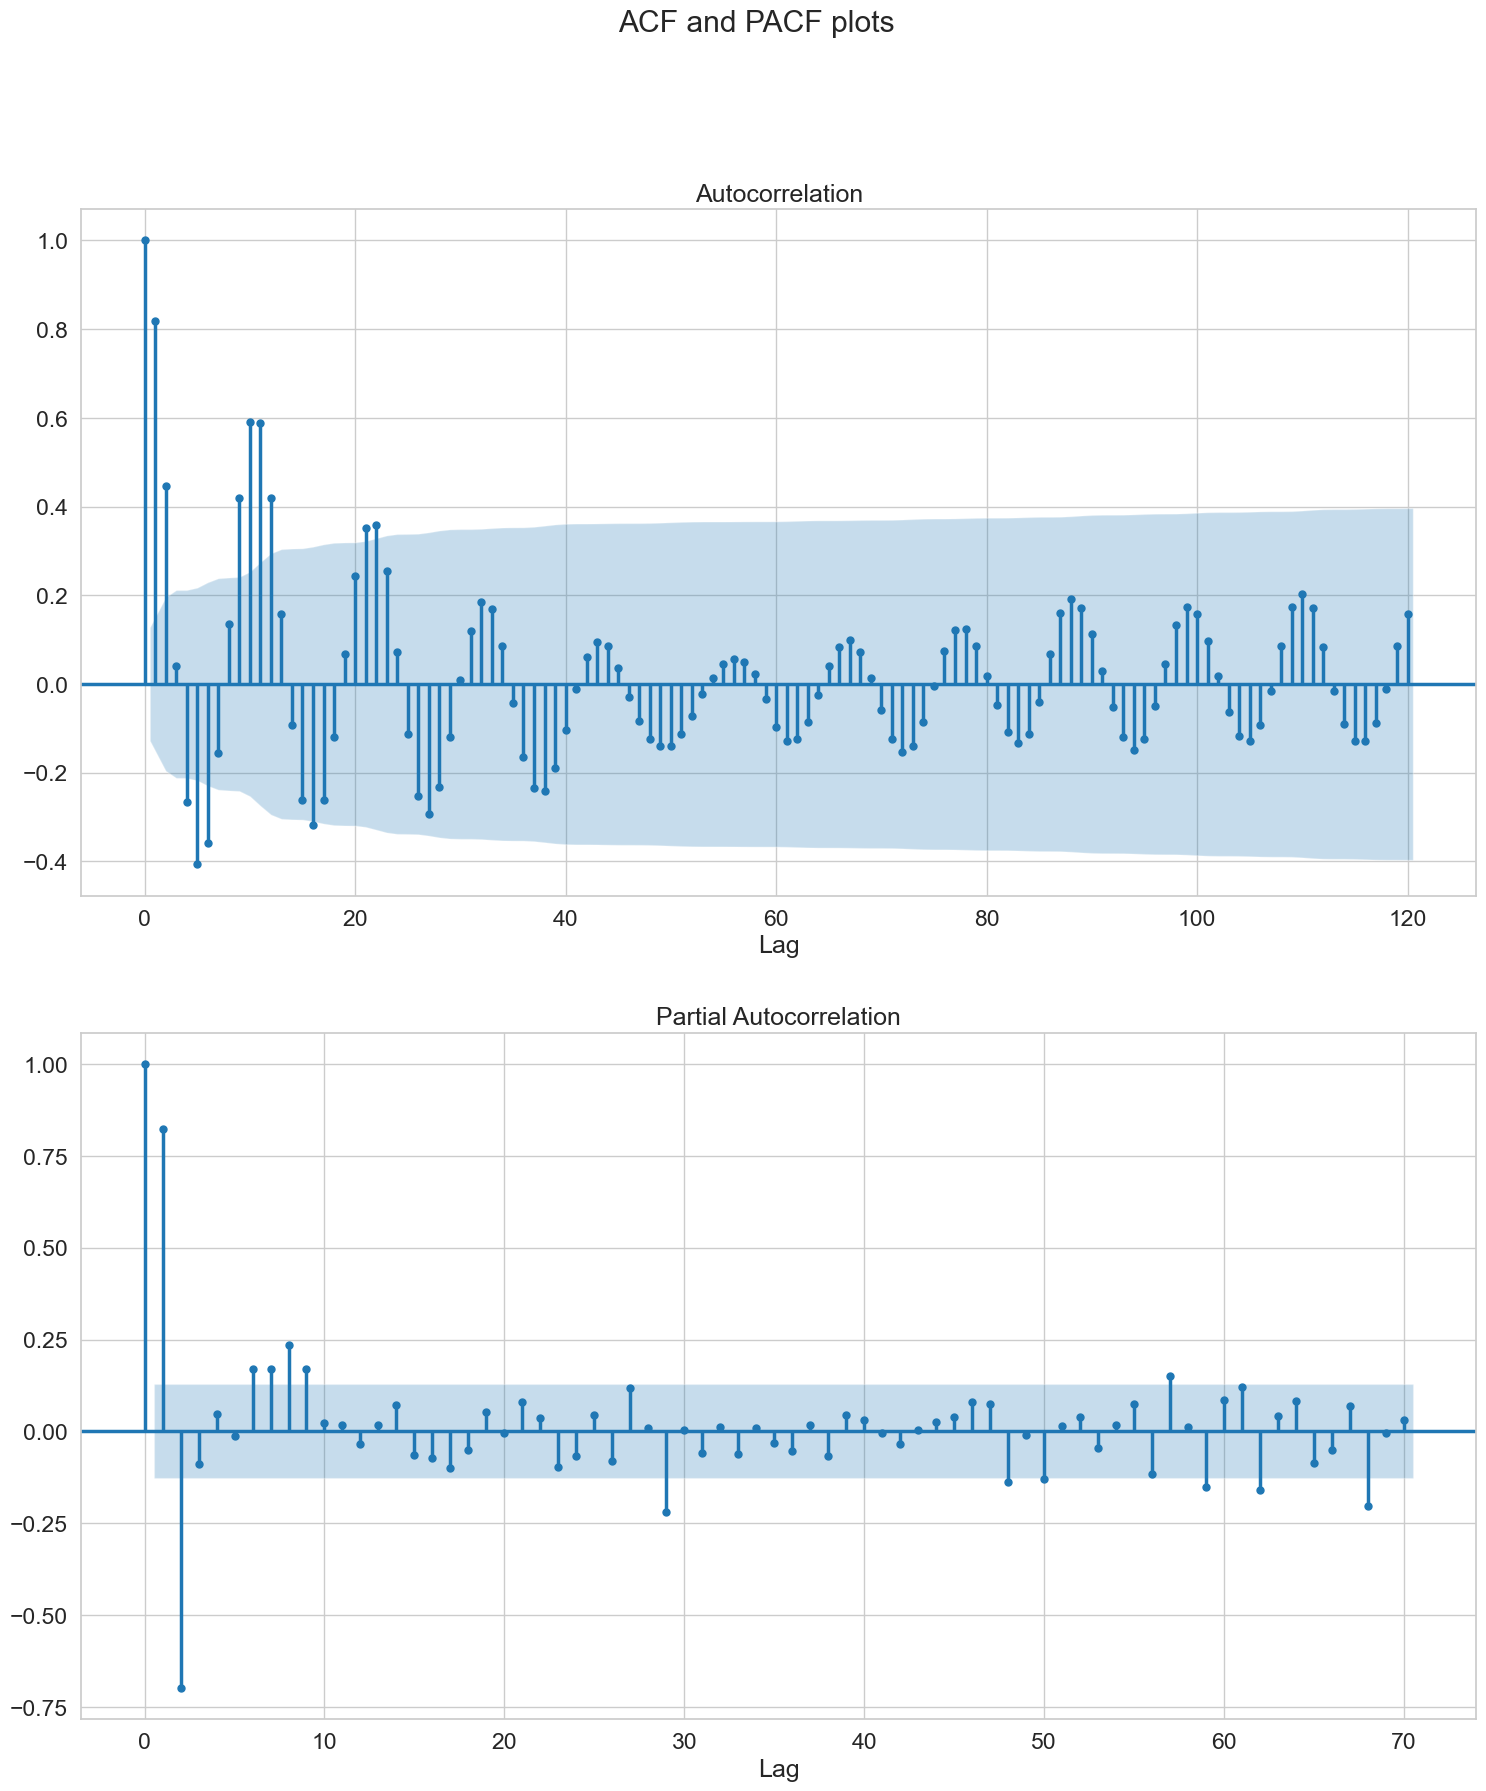

In [827]:
fig_auto, axes = plt.subplots(2,1,figsize=(18,20), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(df_sar['Sunspots'], lags=120, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(df_sar['Sunspots'], lags=70, ax=axes[1])
axes[1].set_xlabel('Lag')
plt.show()

In [837]:
#SARIMAX model
import statsmodels.api as sm
import itertools

p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, d, q))]

store = pd.DataFrame(columns=['p,d,q','P,D,Q,s','AIC'])

def sarimax_pdq(pdq, seasonal_pdq,dataset):
    store = pd.DataFrame(columns=['p,d,q','P,D,Q,s','AIC'])
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(dataset,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
                res_SARIMAX = mod.fit()
                store_int = pd.Series([param,param_seasonal,res_SARIMAX.aic], index=store.columns)
                store = matriz.append(store_int,ignore_index=True)
            except: 
                continue
    return store

store = sarimax_pdq(pdq,seasonal_pdq,train_sar)
best_idx = store['AIC'].idxmin()
print('Best parameters: SARIMAX{}{}'.format(store.iloc[best_idx,0],store.iloc[best_idx,1]))

Best parameters: SARIMAX(3, 1, 3)(3, 1, 3, 11)


In [845]:
mod = sm.tsa.statespace.SARIMAX(train_sar,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 11))
res_SARIMAX = mod.fit()
print(res_SARIMAX.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7234      0.641      2.690      0.007       0.468       2.979
ar.L2         -1.1562      0.914     -1.265      0.206      -2.948       0.636
ar.L3          0.1874      0.515      0.364      0.716      -0.822       1.197
ma.L1         -1.3942      0.653     -2.135      0.033      -2.674      -0.114
ma.L2          0.4038      0.755      0.535      0.593      -1.076       1.884
ma.L3          0.1049      0.213      0.493      0.622      -0.312       0.522
ar.S.L11      -0.6090      0.899     -0.677      0.498      -2.372       1.154
ar.S.L22      -0.3640      0.826     -0.441      0.659      -1.982       1.254
ar.S.L33      -0.1881      0.152     -1.240      0.215      -0.486       0.109
ma.S.L11      -0.1562      0.930     -0.168      0.867      -1.980       1.667
ma.S.L22      -0.1012      0.671     -0.151      0.8

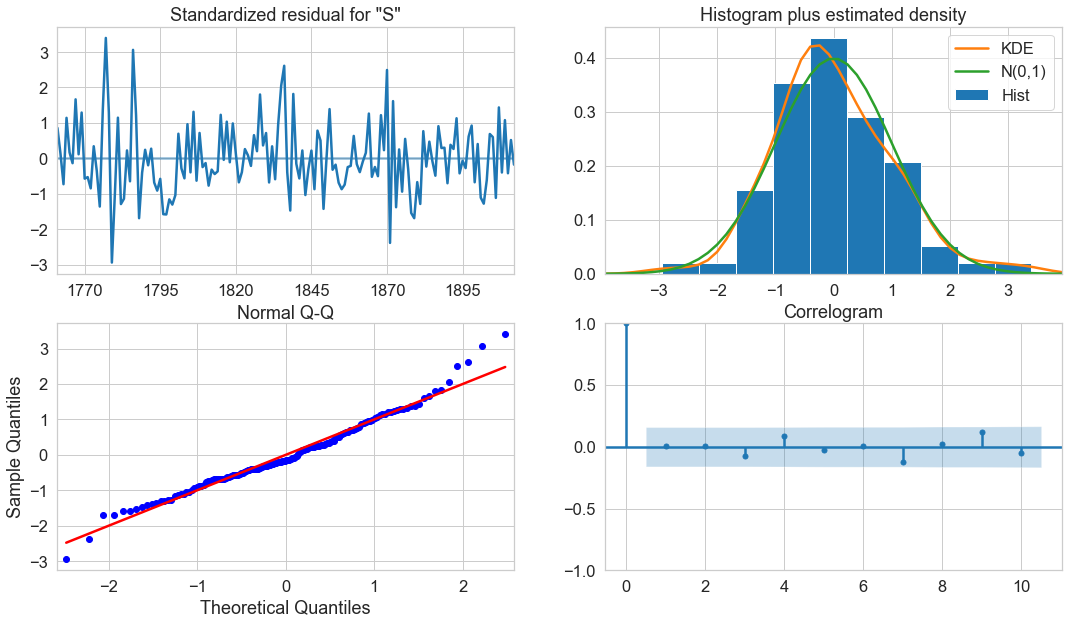

In [846]:
res_SARIMAX.plot_diagnostics(figsize=(18, 10))
plt.show()

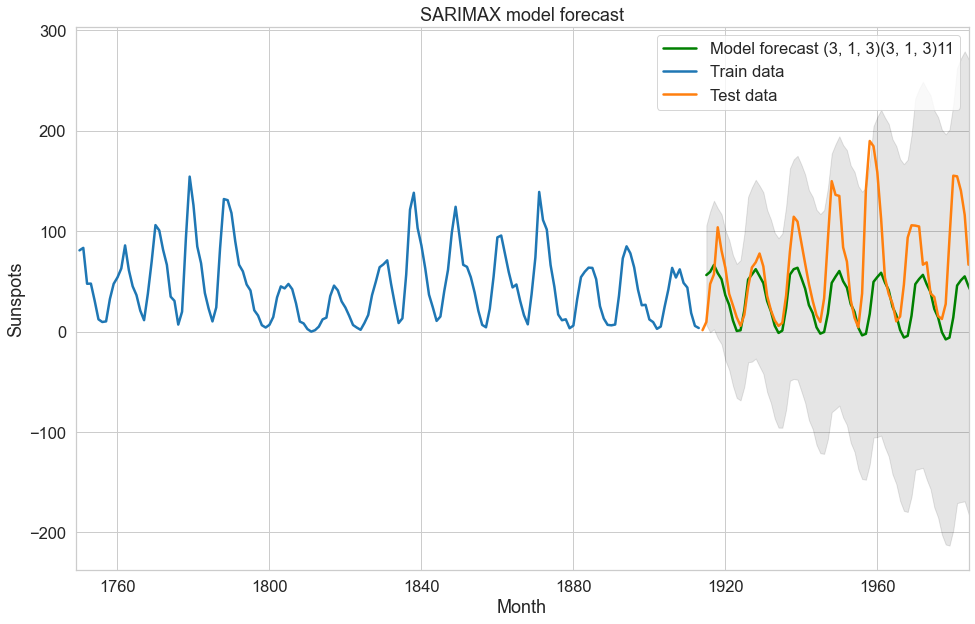

In [840]:
yhat_SARIMAX = res_SARIMAX.predict(start=len(train_sar)+1, end=(len(df_sar)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_SARIMAX,color = 'green')
bx = sns.lineplot(data=train_sar.squeeze())
cx = sns.lineplot(data=test_sar.squeeze())
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('SARIMAX model forecast')
ax.set_xlim('1749-01-01','1984-01-01')
#ax.set_ylim(-50,300)

fcast = res_SARIMAX.get_prediction(start=len(train_sar)+1, end=(len(df_sar)), dynamic=False).summary_frame()
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

plt.legend(labels=["Model forecast (3, 1, 3)(3, 1, 3)11", "Train data", "Test data"])
plt.show()

In [841]:
MAE = median_absolute_error(test_sar, yhat_SARIMAX)
RMSE = mean_squared_error(test_sar, yhat_SARIMAX,squared=False)
MAPE = mean_absolute_percentage_error(test_sar, yhat_SARIMAX)
MASE = MASE_func(train_sar['Sunspots'],test_sar['Sunspots'],yhat_SARIMAX)

print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=29.452
RMSE=51.723
MAPE=1.308
MASE=2.327


In [924]:
mod1 = sm.tsa.statespace.SARIMAX(train_sar,
                                order=(6, 1, 22),
                                seasonal_order=(1, 1, 0, 11))
res_SARIMAX1 = mod1.fit()
print(res_SARIMAX1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1319      1.998      0.066      0.947      -3.784       4.048
ar.L2         -0.1163      0.879     -0.132      0.895      -1.840       1.607
ar.L3         -0.2864      0.625     -0.458      0.647      -1.511       0.938
ar.L4         -0.1814      0.719     -0.252      0.801      -1.590       1.227
ar.L5         -0.0448      0.623     -0.072      0.943      -1.266       1.176
ar.L6         -0.1555      0.597     -0.260      0.794      -1.325       1.014
ma.L1          0.1765      1.902      0.093      0.926      -3.551       3.904
ma.L2         -0.0508      1.478     -0.034      0.973      -2.948       2.846
ma.L3         -0.0624      1.012     -0.062      0.951      -2.046       1.921
ma.L4          0.0300      1.118      0.027      0.979      -2.161       2.221
ma.L5         -0.2865      1.130     -0.254      0.8

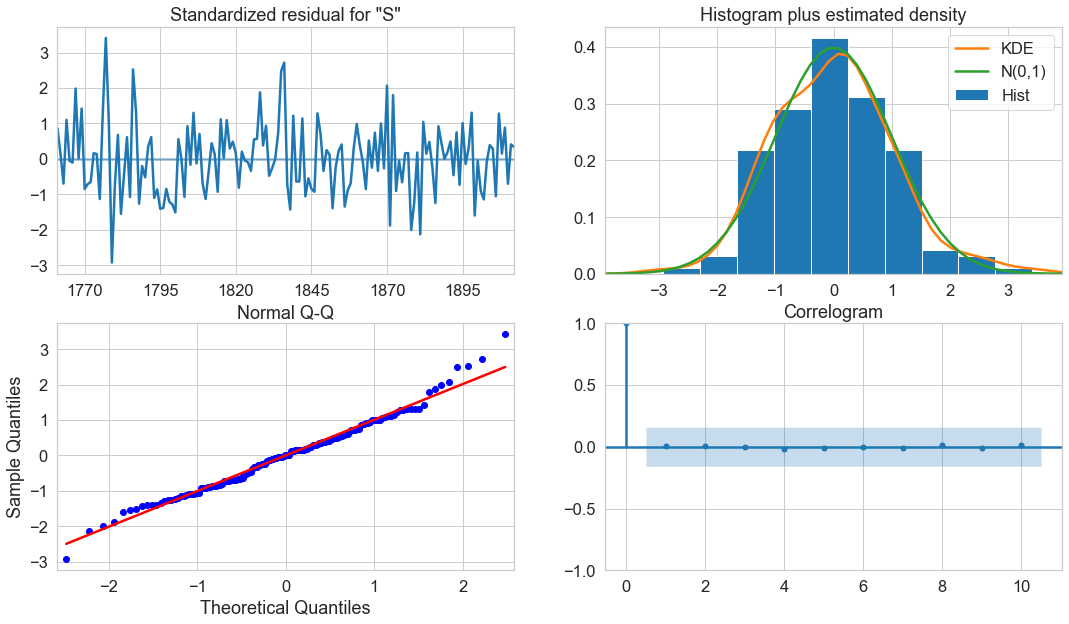

In [925]:
res_SARIMAX1.plot_diagnostics(figsize=(18, 10))
plt.show()

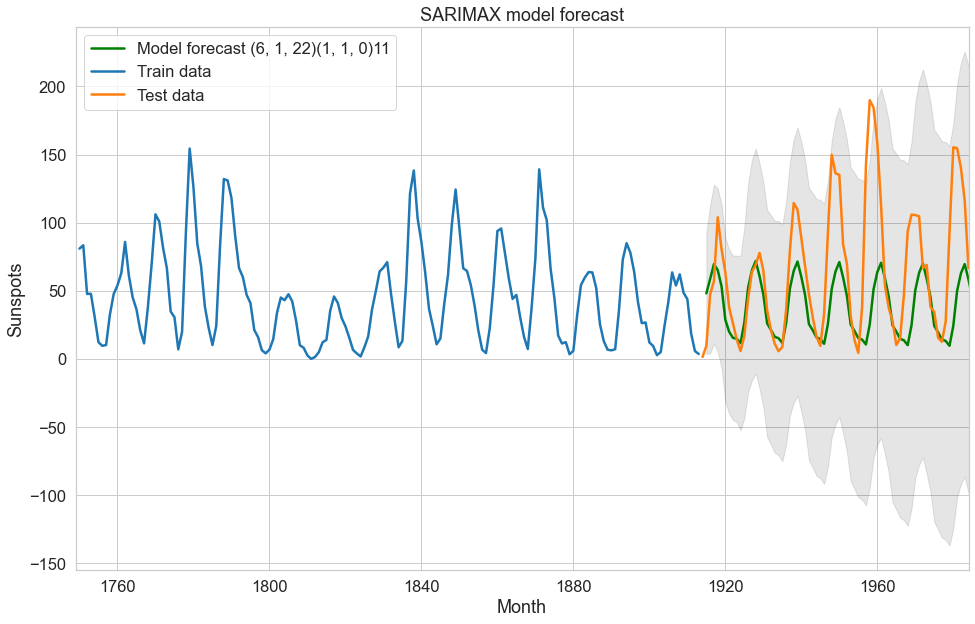

In [926]:
yhat_SARIMAX1 = res_SARIMAX1.predict(start=len(train_sar)+1, end=(len(df_sar)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_SARIMAX1,color = 'green')
bx = sns.lineplot(data=train_sar.squeeze())
cx = sns.lineplot(data=test_sar.squeeze())
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('SARIMAX model forecast')
ax.set_xlim('1749-01-01','1984-01-01')
#ax.set_ylim(-50,300)

fcast1 = res_SARIMAX1.get_prediction(start=len(train_sar)+1, end=(len(df_sar)), dynamic=False).summary_frame()
ax.fill_between(fcast1.index, fcast1['mean_ci_lower'], fcast1['mean_ci_upper'], color='k', alpha=0.1);

plt.legend(labels=["Model forecast (6, 1, 22)(1, 1, 0)11", "Train data", "Test data"])
plt.show()

In [927]:
MAE = median_absolute_error(test_sar, yhat_SARIMAX1)
RMSE = mean_squared_error(test_sar, yhat_SARIMAX1,squared=False)
MAPE = mean_absolute_percentage_error(test_sar, yhat_SARIMAX1)
MASE = MASE_func(train_sar['Sunspots'],test_sar['Sunspots'],yhat_SARIMAX1)

print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=23.657
RMSE=46.857
MAPE=1.069
MASE=2.030


----------------------

## 3. Conclusion

In this notebook, we were able to analyze and forecast a time series. After preparing the data, we did an intial exploratory analysis to verify if there were any seasonal or ciclic pattern in the time series. We needed to differencing our data to remove the trend component and the seasonal component. Then, we used the ADH and KPSS tests to verifiy if the resulting data series was really stationary. Next, we started constructing our forecast model. Fisrt, we split the data in training and testing data sets and used a simple average forecast. This method did not performed well, so we tested ARIMA models:

1. Autoregressive model (AR)
2. Moving average model (MA)
3. Autoregressive moving average model (ARMA)
4. Autoregressive integrated moving average model (ARIMA)

As this models did not perform well too, we tried a seasonal ARIMA method, the SARIMA.

We verified that none of the models SARIMA method, as expected, performed better than the previous methods. However, due to the high computing cost of the SARIMA, the method was trained and tested using a downsampled version of the dataset.